## Regular Vis of depth maps

File: /home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy
Shape: (498, 640)
  Height: 498
  Width:  640
Dtype: float16
Bit depth per pixel: 16
Min: 0.0
Max: 0.99951171875
Mean: inf
Std: inf
Value histogram (10 bins):
  [0.00, 0.10]: 57923
  [0.10, 0.20]: 40774
  [0.20, 0.30]: 21879
  [0.30, 0.40]: 13751
  [0.40, 0.50]: 8509
  [0.50, 0.60]: 10221
  [0.60, 0.70]: 144805
  [0.70, 0.80]: 998
  [0.80, 0.90]: 3887
  [0.90, 1.00]: 15973
--- End of summary ---
--- Quantization Analysis ---
Unique uint8 values in image: 256 / 318720
Unique float values in image: 9589 / 318720
Fraction of unique values after quantization: 0.001


/home/abradshaw/.pyenv/versions/3.10.12/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


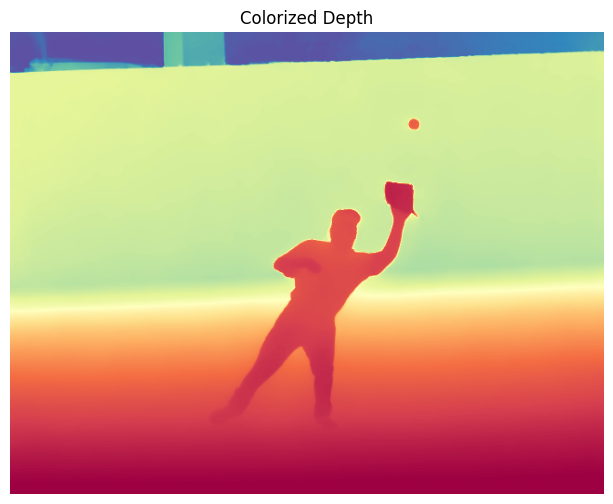

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy' 
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path)

shape = arr.shape
dtype = arr.dtype
bit_depth = arr.dtype.itemsize * 8

print(f'File: {npy_path}')
print(f'Shape: {shape}')
if len(shape) == 2:
    print(f'  Height: {shape[0]}')
    print(f'  Width:  {shape[1]}')
else:
    print('  (Warning: Not a 2D array!)')
print(f'Dtype: {dtype}')
print(f'Bit depth per pixel: {bit_depth}')

if np.issubdtype(dtype, np.floating) or np.issubdtype(dtype, np.integer):
    print(f'Min: {np.nanmin(arr)}')
    print(f'Max: {np.nanmax(arr)}')
    print(f'Mean: {np.nanmean(arr)}')
    print(f'Std: {np.nanstd(arr)}')
else:
    print('(Non-numeric array, skipping value stats)')

n_nan = np.isnan(arr).sum() if np.issubdtype(dtype, np.floating) else 0
n_inf = np.isinf(arr).sum() if np.issubdtype(dtype, np.floating) else 0
if n_nan > 0 or n_inf > 0:
    print(f'NaNs: {n_nan}, Infs: {n_inf}')

# Print histogram (clipped to 10 bins for terminal)
if np.issubdtype(dtype, np.floating) or np.issubdtype(dtype, np.integer):
    try:
        hist, edges = np.histogram(arr[~np.isnan(arr)], bins=10)
        print('Value histogram (10 bins):')
        for i in range(len(hist)):
            print(f'  [{edges[i]:.2f}, {edges[i+1]:.2f}]: {hist[i]}')
    except Exception as e:
        print(f'  (Could not compute histogram: {e})')

print('--- End of summary ---')
print('--- Quantization Analysis ---')
# Quantize to 8-bit (0-255)
arr_uint8 = np.clip(np.round(arr * 255), 0, 255).astype(np.uint8)

# Use the entire image
num_unique = len(np.unique(arr_uint8))
num_pixels = arr_uint8.size

num_unique_float = len(np.unique(arr))
print(f'Unique uint8 values in image: {num_unique} / {num_pixels}')
print(f'Unique float values in image: {num_unique_float} / {num_pixels}')
print(f'Fraction of unique values after quantization: {num_unique / num_pixels:.3f}')
plt.figure(figsize=(8, 6))
# Mask NaNs for display
masked = np.ma.masked_invalid(arr)
im = plt.imshow(masked, cmap='Spectral')
plt.title('Colorized Depth')
plt.axis('off')
plt.show()


## Keypoints Visualization with depth

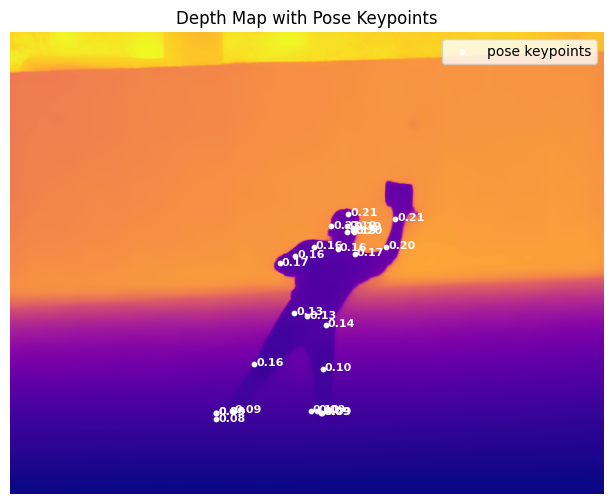

Pose keypoints (x, y) → depth:
  (363, 215) → 0.1859130859375000
  (369, 211) → 0.1931152343750000
  (363, 209) → 0.1905517578125000
  (370, 215) → 0.1950683593750000
  (346, 209) → 0.2258300781250000
  (371, 239) → 0.1719970703125000
  (327, 231) → 0.1583251953125000
  (405, 231) → 0.1984863281250000
  (290, 249) → 0.1700439453125000
  (415, 201) → 0.2053222656250000
  (307, 241) → 0.1578369140625000
  (340, 315) → 0.1380615234375000
  (306, 302) → 0.1322021484375000
  (337, 363) → 0.1011352539062500
  (263, 357) → 0.1593017578125000
  (330, 408) → 0.0899658203125000
  (239, 408) → 0.0942993164062500
  (364, 196) → 0.2087402343750000
  (353, 233) → 0.1646728515625000
  (320, 306) → 0.1324462890625000
  (335, 410) → 0.0889892578125000
  (222, 417) → 0.0824584960937500
  (336, 410) → 0.0887451171875000
  (222, 410) → 0.0932006835937500
  (324, 408) → 0.1016845703125000
  (222, 410) → 0.0932006835937500

Summary statistics for the ENTIRE depth map
     min: 0.000000
     max: 0.982422
  

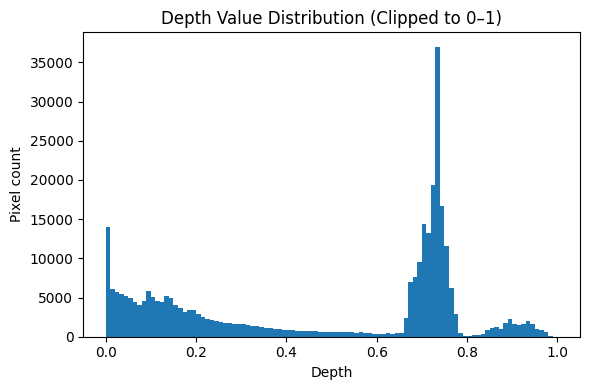

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# —————————————————————
# 1) Load your depth map
# —————————————————————
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path)   # arr.shape == (H, W)

# ————————————————————————————————————————
# 2) Hard-code your decoded keypoints (x, y) here
# ————————————————————————————————————————
# From your “Decoded keypoints” output:
keypoints = np.array([
    [363, 215],
    [369, 211],
    [363, 209],
    [370, 215],
    [346, 209],
    [371, 239],
    [327, 231],
    [405, 231],
    [290, 249],
    [415, 201],
    [307, 241],
    [340, 315],
    [306, 302],
    [337, 363],
    [263, 357],
    [330, 408],
    [239, 408],
    [364, 196],
    [353, 233],
    [320, 306],
    [335, 410],
    [222, 417],
    [336, 410],
    [222, 410],
    [324, 408],
    [222, 410],
])
# squeeze out any batch-dim and round to integer pixel coords:
manual_pts = np.round(keypoints).astype(int)  # shape (26,2)

# ——————————————————————————————————
# 3) Clip them to image bounds
# ——————————————————————————————————
H, W = arr.shape
manual_pts[:, 0] = np.clip(manual_pts[:, 0], 0, W-1)  # x
manual_pts[:, 1] = np.clip(manual_pts[:, 1], 0, H-1)  # y

# ——————————————————————————————————
# 4) Sample depth at those pixels
# ——————————————————————————————————
depths_at_pts = arr[manual_pts[:,1], manual_pts[:,0]]  # (26,)

# ——————————————————————————————————
# 5) Visualize
# ——————————————————————————————————
plt.figure(figsize=(8,6))
masked = np.ma.masked_invalid(arr)
im = plt.imshow(masked, cmap='plasma')
plt.title('Depth Map with Pose Keypoints')

# draw keypoints
plt.scatter(manual_pts[:,0], manual_pts[:,1],
            c='white', s=40, marker='.', label='pose keypoints')
for (x,y), d in zip(manual_pts, depths_at_pts):
    plt.text(x+2, y+2, f'{d:.2f}',
             color='white', fontsize=8, weight='bold')
plt.axis('off')
plt.legend(loc='upper right')
plt.show()

# ——————————————————————————————————
# 6) Print out the depths
# ——————————————————————————————————
print("Pose keypoints (x, y) → depth:")
for (x,y), d in zip(manual_pts, depths_at_pts):
    print(f"  ({x:3d}, {y:3d}) → {d:.16f}")


# ------------------------------------------------------------
# 7) Summary statistics for the whole depth map
# ------------------------------------------------------------
full_vals = arr[np.isfinite(arr)].astype(np.float64)         # all valid pixels

full_stats = {
    "min"   : float(full_vals.min()),
    "max"   : float(full_vals.max()),
    "mean"  : float(full_vals.mean()),
    "median": float(np.median(full_vals)),
    "std"   : float(full_vals.std()),
    "pixels": full_vals.size,
}

print("\nSummary statistics for the ENTIRE depth map")
for k, v in full_stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")

# ------------------------------------------------------------
# 8) Summary statistics for the 26 pose key-points
# ------------------------------------------------------------
kp_stats = {
    "min"   : float(depths_at_pts.min()),
    "max"   : float(depths_at_pts.max()),
    "mean"  : float(depths_at_pts.mean()),
    "median": float(np.median(depths_at_pts)),
    "std"   : float(depths_at_pts.std()),
    "points": depths_at_pts.size,
}

print("\nSummary statistics for the 26 pose key-points")
for k, v in kp_stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")



print("Check full_vals range:")
print("  min:", full_vals.min())
print("  max:", full_vals.max())
print("  99th percentile:", np.percentile(full_vals, 99))
print("  99.9th percentile:", np.percentile(full_vals, 99.9))
print("Infs in full_vals:", np.isinf(full_vals).sum())
print("Max full_vals:", np.max(full_vals))
print("Top 5 largest values:", np.sort(full_vals)[-5:])
print("arr dtype:", arr.dtype)


# Plot histogram to visualize distribution
plt.figure(figsize=(6,4))
plt.hist(full_vals, bins=100, range=(0, 1))  # Adjust range if needed
plt.title("Depth Value Distribution (Clipped to 0–1)")
plt.xlabel("Depth")
plt.ylabel("Pixel count")
plt.tight_layout()
plt.show()



## Keypoints with depth and ROI scaling

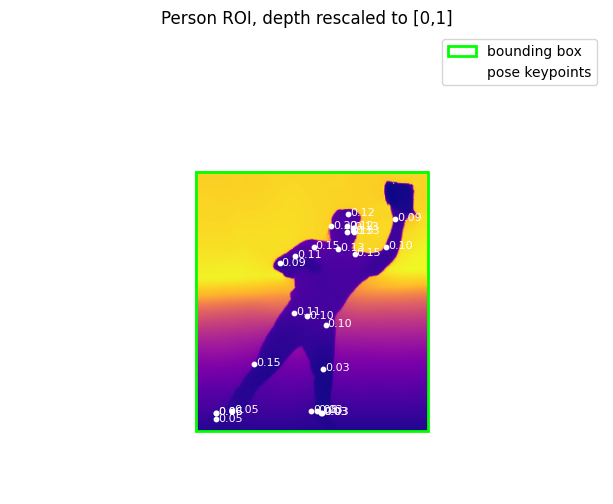

Pose key-points (x, y) → depth [0-1 within box]:
  (363, 215) → 0.126953
  (369, 211) → 0.126099
  (363, 209) → 0.121643
  (370, 215) → 0.130371
  (346, 209) → 0.218750
  (371, 239) → 0.154175
  (327, 231) → 0.152100
  (405, 231) → 0.099365
  (290, 249) → 0.088013
  (415, 201) → 0.086182
  (307, 241) → 0.113098
  (340, 315) → 0.099182
  (306, 302) → 0.108521
  (337, 363) → 0.025085
  (263, 357) → 0.145874
  (330, 408) → 0.031464
  (239, 408) → 0.051270
  (364, 196) → 0.117310
  (353, 233) → 0.130371
  (320, 306) → 0.100159
  (335, 410) → 0.028900
  (222, 417) → 0.048401
  (336, 410) → 0.028519
  (222, 410) → 0.061249
  (324, 408) → 0.082581
  (222, 410) → 0.061249

Summary statistics for *rescaled* depth inside ROI
     min: 0.000000
     max: 1.000000
    mean: 0.467285
  median: 0.341309
     std: 0.368164
  pixels: 70531

Summary statistics for pose key-points inside ROI
     min: 0.025085
     max: 0.218750
    mean: 0.097595
  median: 0.099731
     std: 0.046021
  points: 26


In [3]:
# ------------------------------------------------------------
# 1) Bounding-box mask
# ------------------------------------------------------------
# coordinates:  (x1, y1) = top-left,  (x2, y2) = bottom-right
x1, y1, x2, y2 = 200, 150, 450, 430          # <-- edit here
bbox = np.array([x1, y1, x2, y2], int)

H, W = arr.shape
# boolean mask: True inside the box
mask = np.zeros((H, W), dtype=bool)
mask[bbox[1]:bbox[3]+1, bbox[0]:bbox[2]+1] = True

# ------------------------------------------------------------
# 2) Min-max rescale inside the box
# ------------------------------------------------------------
masked_vals = arr[mask]
d_min, d_max = masked_vals.min(), masked_vals.max()

# avoid /0 if flat
if d_max > d_min:
    arr_rescaled = (arr - d_min) / (d_max - d_min)
else:                                    # flat plane
    arr_rescaled = np.zeros_like(arr)

# keep only ROI; set background to 0 (or np.nan)
background_val = 0.0                     # change to np.nan if preferred
arr_roi = np.where(mask, arr_rescaled, background_val)

# ------------------------------------------------------------
# 3) Depth at pose key-points *after* scaling
# ------------------------------------------------------------
# re-use manual_pts from your snippet
depths_roi = arr_roi[manual_pts[:,1], manual_pts[:,0]]

# ------------------------------------------------------------
# 4) Visualise
# ------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.imshow(np.ma.masked_equal(arr_roi, background_val), cmap='plasma')
plt.title('Person ROI, depth rescaled to [0,1]')

# draw bbox
plt.gca().add_patch(
    plt.Rectangle((x1, y1), x2-x1, y2-y1,
                  edgecolor='lime', facecolor='none', linewidth=2,
                  label='bounding box')
)

# draw key-points
plt.scatter(manual_pts[:,0], manual_pts[:,1],
            c='white', s=40, marker='.', label='pose keypoints')

for (x,y), d in zip(manual_pts, depths_roi):
    plt.text(x+2, y+2, f'{d:.2f}', color='white', fontsize=8)

plt.axis('off')
plt.legend(loc='upper right')
plt.show()

# ------------------------------------------------------------
# 5) Print depths
# ------------------------------------------------------------
print("Pose key-points (x, y) → depth [0-1 within box]:")
for (x,y), d in zip(manual_pts, depths_roi):
    print(f"  ({x:3d}, {y:3d}) → {d:.6f}")

# ------------------------------------------------------------
# 6) Summary statistics inside the ROI
# ------------------------------------------------------------
roi_vals = arr_roi[mask]          # these are already ∈ [0,1]

stats = {
    "min":    float(roi_vals.min()),
    "max":    float(roi_vals.max()),
    "mean":   float(roi_vals.mean()),
    "median": float(np.median(roi_vals)),
    "std":    float(roi_vals.std()),
    "pixels": roi_vals.size,
}

print("\nSummary statistics for *rescaled* depth inside ROI")
for k, v in stats.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")

pose_stats_roi = {
    "min"   : float(depths_roi.min()),
    "max"   : float(depths_roi.max()),
    "mean"  : float(depths_roi.mean()),
    "median": float(np.median(depths_roi)),
    "std"   : float(depths_roi.std()),
    "points": depths_roi.size,
}

print("\nSummary statistics for pose key-points inside ROI")
for k, v in pose_stats_roi.items():
    print(f"  {k:>6}: {v:.6f}" if isinstance(v, float) else f"  {k:>6}: {v}")


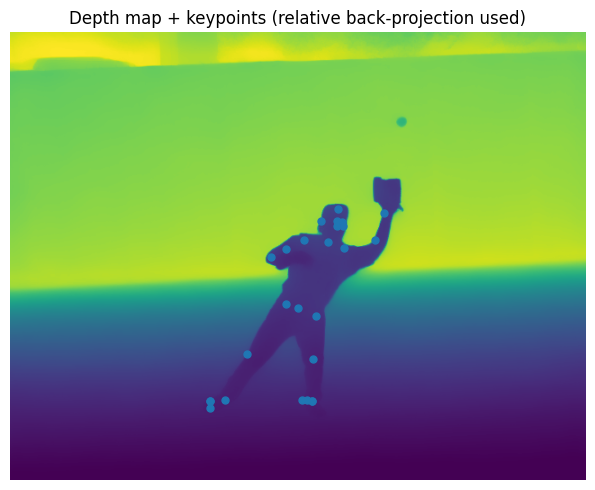


=== Relative 3-D segment lengths ===
 L_thigh: 0.048181
 L_shank: 0.010400
 R_thigh: 0.021350
 R_shank: 0.010225

=== Knee angles ===
L_knee_rad: 2.751
R_knee_rad: 2.097
L_knee_deg: 157.597
R_knee_deg: 120.123

=== Relative MTU indices (unitless; placeholder knee-only models) ===
  RF_L: 2.9019
 HAM_L: -2.5993
 GAS_L: -2.0492
  RF_R: 2.1845
 HAM_R: -2.0086
 GAS_R: -1.5893


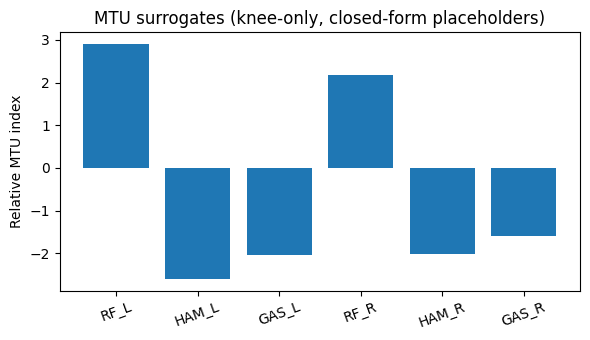


NOTE:
- All outputs are RELATIVE (no metric intrinsics or OpenSim fits required).
- The MTU surrogates above are placeholders using knee angle only; replace COEFF tensors
  with OpenSim-fitted coefficients later (and add hip/ankle terms when available).


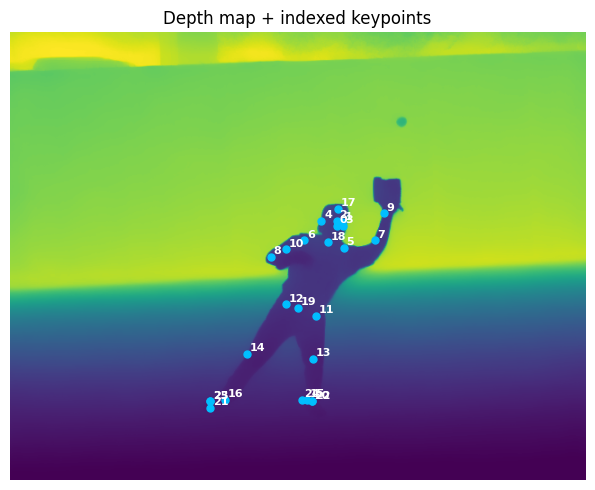


Edge distances (2D pixels vs 3D relative units):
  L_thigh?: 2D=  68.43 px   3D=0.048181
  L_shank?: 2D=  45.54 px   3D=0.010400
  R_thigh?: 2D=  81.02 px   3D=0.021350
  R_shank?: 2D=  18.79 px   3D=0.010225

Knee flexion (deg):  L=22.4   R=59.9

Relative MTU indices (driven by knee FLEXION now):
  RF_L: 0.3941
 HAM_L: -0.3879
 GAS_L: -0.3097
  RF_R: 1.0669
 HAM_R: -1.0232
 GAS_R: -0.8142


In [4]:
# ==== 2D (x,y) + depth → relative 3D, angles, and MTU (closed-form surrogate, no intrinsics required) ====
import numpy as np
import matplotlib.pyplot as plt
import os

# ——————————————————————————————————————————————————————————
# 0) INPUTS: depth map + SIMCC keypoints (pixels)
# ——————————————————————————————————————————————————————————
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path).astype(np.float32)  # (H, W)

keypoints = np.array([
    [363, 215],[369, 211],[363, 209],[370, 215],[346, 209],[371, 239],
    [327, 231],[405, 231],[290, 249],[415, 201],[307, 241],[340, 315],
    [306, 302],[337, 363],[263, 357],[330, 408],[239, 408],[364, 196],
    [353, 233],[320, 306],[335, 410],[222, 417],[336, 410],[222, 410],
    [324, 408],[222, 410],
], dtype=np.int32)

H, W = arr.shape
pts = np.round(keypoints).astype(int)
pts[:, 0] = np.clip(pts[:, 0], 0, W-1)
pts[:, 1] = np.clip(pts[:, 1], 0, H-1)

# ——————————————————————————————————————————————————————————
# 1) DEPTH at keypoints: k×k patch, MAD-trimmed median (robust)
# ——————————————————————————————————————————————————————————
def patch_median(a, x, y, k=5, tau=3.0):
    H, W = a.shape
    r = k // 2
    xs = np.clip(np.arange(x-r, x+r+1), 0, W-1)
    ys = np.clip(np.arange(y-r, y+r+1), 0, H-1)
    z = a[np.ix_(ys, xs)].ravel()
    z = z[np.isfinite(z)]
    if z.size == 0:
        return float(a[y, x])
    med = np.median(z)
    mad = np.median(np.abs(z - med)) + 1e-6
    keep = np.abs(z - med) < tau * mad
    z = z[keep] if keep.any() else z
    return float(np.median(z))

D_kp = np.array([patch_median(arr, int(x), int(y), k=5, tau=3.0) for x, y in pts], dtype=np.float32)

# ——————————————————————————————————————————————————————————
# 2) BACK-PROJECTION to 3-D (RELATIVE units; no intrinsics needed)
#     X = (u−cx)Z/fx,  Y = (v−cy)Z/fy,  Z = Z
#     Fallback intrinsics: fx=fy=max(W,H); cx,cy=center of image.
# ——————————————————————————————————————————————————————————
fx = fy = float(max(W, H))
cx, cy = (W - 1) / 2.0, (H - 1) / 2.0

def backproject(uv, Z, fx, fy, cx, cy):
    uv = uv.astype(np.float32); Z = Z.astype(np.float32)
    X = (uv[:,0] - cx) * Z / fx
    Y = (uv[:,1] - cy) * Z / fy
    return np.stack([X, Y, Z], axis=-1)

P3 = backproject(pts, D_kp, fx, fy, cx, cy)   # (N,3) in relative units

# ——————————————————————————————————————————————————————————
# 3) Skeleton indices (you only need knee angles for now)
# ——————————————————————————————————————————————————————————
IDX = dict(
    L_HIP = 12, L_KNEE = 13, L_ANKLE = 15,
    R_HIP = 11, R_KNEE = 10, R_ANKLE = 8,
)

def seg_len(P3, i, j):
    if min(i,j) < 0 or max(i,j) >= P3.shape[0]: return np.nan
    return float(np.linalg.norm(P3[i] - P3[j]))

lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
}

# 3-point knee angle (signed by XZ plane)
def joint_angle(A, B, C):
    BA, BC = A - B, C - B
    theta = np.arctan2(np.linalg.norm(np.cross(BA, BC)), np.dot(BA, BC) + 1e-9)
    # sagittal sign via XZ
    BAxz, BCxz = BA[[0,2]], BC[[0,2]]
    sign = np.sign(BAxz[0]*BCxz[1] - BAxz[1]*BCxz[0])
    return float(sign * theta)

def safe_angle(P3, i, j, k):
    n = P3.shape[0]
    if min(i,j,k) < 0 or max(i,j,k) >= n: return np.nan
    return joint_angle(P3[i], P3[j], P3[k])

angles = {
    "L_knee_rad": safe_angle(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_knee_rad": safe_angle(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"]),
}
angles["L_knee_deg"] = np.degrees(angles["L_knee_rad"]) if np.isfinite(angles["L_knee_rad"]) else np.nan
angles["R_knee_deg"] = np.degrees(angles["R_knee_rad"]) if np.isfinite(angles["R_knee_rad"]) else np.nan

# ——————————————————————————————————————————————————————————
# 4) CLOSED-FORM MTU SURROGATES (3rd-order polynomials, knee-only placeholders)
#     This runs without OpenSim fits; outputs are RELATIVE indices (unitless).
#     Replace *_COEFFS later with real OpenSim-fitted tensors.
#     General form: L̂(θ_hip, θ_knee, θ_ankle) = Σ C[i,j,k] θ_hip^i θ_knee^j θ_ankle^k
#     For now we set hip=ankle=0 and use knee only: L̂(θ_knee) = Σ c_j θ_knee^j
# ——————————————————————————————————————————————————————————
def eval_mtu_poly(theta_hip, theta_knee, theta_ankle, C):
    if C is None:
        return float('nan')
    T = np.array([1.0, theta_hip,  theta_hip**2,  theta_hip**3],  dtype=np.float64)
    K = np.array([1.0, theta_knee, theta_knee**2, theta_knee**3], dtype=np.float64)
    A = np.array([1.0, theta_ankle,theta_ankle**2,theta_ankle**3],dtype=np.float64)
    # sum_{i,j,k} C[i,j,k] * T[i] * K[j] * A[k]
    return float(np.einsum('ijk,i,j,k->', C, T, K, A))


# Placeholder coefficients (unit weights) → RELATIVE behavior only
# Rectus femoris: length ↑ with knee flexion (extensor → flexion stretches it)
RF_COEFFS = np.zeros((4,4,4), dtype=np.float64)
RF_COEFFS[0,1,0] = +1.0           # linear knee term
RF_COEFFS[0,2,0] = +0.02          # mild curvature for stability

# Hamstrings (e.g., BF long head): length ↓ with knee flexion (flexor shortens)
HAM_COEFFS = np.zeros((4,4,4), dtype=np.float64)
HAM_COEFFS[0,1,0] = -1.0
HAM_COEFFS[0,2,0] = +0.02

# Gastrocnemius (knee component only; ankle omitted here): length ↓ with knee flexion
GAS_COEFFS = np.zeros((4,4,4), dtype=np.float64)
GAS_COEFFS[0,1,0] = -0.8
GAS_COEFFS[0,2,0] = +0.02

θL, θR = angles["L_knee_rad"] if np.isfinite(angles["L_knee_rad"]) else 0.0, \
         angles["R_knee_rad"] if np.isfinite(angles["R_knee_rad"]) else 0.0

mtu_rel = {
    "RF_L":  eval_mtu_poly(0.0, θL, 0.0, RF_COEFFS),
    "HAM_L": eval_mtu_poly(0.0, θL, 0.0, HAM_COEFFS),
    "GAS_L": eval_mtu_poly(0.0, θL, 0.0, GAS_COEFFS),
    "RF_R":  eval_mtu_poly(0.0, θR, 0.0, RF_COEFFS),
    "HAM_R": eval_mtu_poly(0.0, θR, 0.0, HAM_COEFFS),
    "GAS_R": eval_mtu_poly(0.0, θR, 0.0, GAS_COEFFS),
}

# Optional: zero-center to a neutral reference (good for plotting)
for k in list(mtu_rel.keys()):
    mtu_rel[k] = mtu_rel[k] - 0.0  # subtract neutral if you store one; 0 works for single frame

# ——————————————————————————————————————————————————————————
# 5) Visualization & printout
# ——————————————————————————————————————————————————————————
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr))
plt.scatter(pts[:,0], pts[:,1], s=25)
plt.title("Depth map + keypoints (relative back-projection used)"); plt.axis('off'); plt.tight_layout(); plt.show()

print("\n=== Relative 3-D segment lengths ===")
for k, v in lengths.items():
    print(f"{k:>8}: {v:.6f}")

print("\n=== Knee angles ===")
for k, v in angles.items():
    print(f"{k:>10}: {v:.3f}")

print("\n=== Relative MTU indices (unitless; placeholder knee-only models) ===")
for k, v in mtu_rel.items():
    print(f"{k:>6}: {v:.4f}")

# Quick bar for MTU proxies
labels = list(mtu_rel.keys())
vals = [mtu_rel[k] for k in labels]
plt.figure(figsize=(6,3.5))
plt.bar(np.arange(len(labels)), vals)
plt.xticks(np.arange(len(labels)), labels, rotation=20)
plt.ylabel("Relative MTU index")
plt.title("MTU surrogates (knee-only, closed-form placeholders)")
plt.tight_layout(); plt.show()

print("\nNOTE:")
print("- All outputs are RELATIVE (no metric intrinsics or OpenSim fits required).")
print("- The MTU surrogates above are placeholders using knee angle only; replace COEFF tensors")
print("  with OpenSim-fitted coefficients later (and add hip/ankle terms when available).")


# ===== Debug & fixes for bone mapping + knee flexion =====

# 0) Visual: label every keypoint with its index
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr))
plt.scatter(pts[:,0], pts[:,1], s=25, c='deepskyblue')
for idx,(x,y) in enumerate(pts):
    plt.text(x+3, y-3, str(idx), color='white', fontsize=8, weight='bold')
plt.title("Depth map + indexed keypoints")
plt.axis('off'); plt.tight_layout(); plt.show()

# 1) Define YOUR skeleton edges here to verify mapping (edit these!)
#    Start with guesses, then fix after you see the numbered overlay.
SKELETON_EDGES = [
    ("L_thigh?", 12, 13),   # hipL -> kneeL (edit if needed)
    ("L_shank?", 13, 15),   # kneeL -> ankleL (edit if needed)
    ("R_thigh?", 11, 10),   # hipR -> kneeR
    ("R_shank?", 10,  8),   # kneeR -> ankleR
]

# 2) Compare 2D pixel distances vs 3D distances for each edge
def edge_metrics(pts_px, P3, edges):
    rows = []
    for name,i,j in edges:
        if min(i,j) < 0 or max(i,j) >= len(pts_px): 
            rows.append((name, np.nan, np.nan))
            continue
        d2 = float(np.linalg.norm(pts_px[i] - pts_px[j]))         # pixels
        d3 = float(np.linalg.norm(P3[i] - P3[j]))                  # relative 3D units
        rows.append((name, d2, d3))
    return rows

rows = edge_metrics(pts, P3, SKELETON_EDGES)
print("\nEdge distances (2D pixels vs 3D relative units):")
for name, d2, d3 in rows:
    print(f"{name:>10}: 2D={d2:7.2f} px   3D={d3:.6f}")

# If an edge shows **large 2D** but **tiny 3D**, you probably wired the wrong joint,
# or the 'ankle' kp is actually a foot/toe kp. Fix the indices above accordingly.

# 3) Safer knee flexion angle (degrees): flexion = 180° − θ
def knee_flexion_deg(P3, hip_i, knee_i, ankle_i):
    n = P3.shape[0]
    if min(hip_i,knee_i,ankle_i) < 0 or max(hip_i,knee_i,ankle_i) >= n:
        return np.nan
    A, B, C = P3[hip_i], P3[knee_i], P3[ankle_i]
    BA, BC = A - B, C - B
    theta = np.arctan2(np.linalg.norm(np.cross(BA, BC)), np.dot(BA, BC) + 1e-9)  # radians
    return float(max(0.0, 180.0 - np.degrees(theta)))  # clamp to [0,180]

L_flex = knee_flexion_deg(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"])
R_flex = knee_flexion_deg(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"])
print(f"\nKnee flexion (deg):  L={L_flex:.1f}   R={R_flex:.1f}")

# 4) Drive MTU placeholders with **flexion** instead of interior angle
θL = np.deg2rad(L_flex) if np.isfinite(L_flex) else 0.0
θR = np.deg2rad(R_flex) if np.isfinite(R_flex) else 0.0

mtu_rel = {
    "RF_L":  eval_mtu_poly(0.0, θL, 0.0, RF_COEFFS),
    "HAM_L": eval_mtu_poly(0.0, θL, 0.0, HAM_COEFFS),
    "GAS_L": eval_mtu_poly(0.0, θL, 0.0, GAS_COEFFS),
    "RF_R":  eval_mtu_poly(0.0, θR, 0.0, RF_COEFFS),
    "HAM_R": eval_mtu_poly(0.0, θR, 0.0, HAM_COEFFS),
    "GAS_R": eval_mtu_poly(0.0, θR, 0.0, GAS_COEFFS),
}

print("\nRelative MTU indices (driven by knee FLEXION now):")
for k, v in mtu_rel.items():
    print(f"{k:>6}: {v:.4f}")


Relative 3-D segment lengths (unitless):
  L_thigh: 0.035439
  L_shank: 0.086319
  R_thigh: 0.044840
  R_shank: 0.010400
   L_foot: 0.003855
   R_foot: 0.002781

Knee flexion (deg):  Left=150.0   Right=21.4

Normalized by leg length:
  L_thigh/leg: 0.291  L_shank/leg: 0.709
  R_thigh/leg: 0.812  R_shank/leg: 0.188


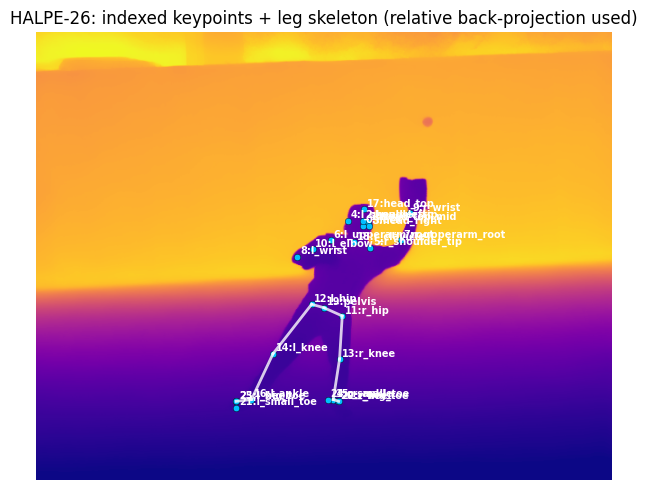

In [6]:
# ==== HALPE-26 oriented measurements: label kps, draw skeleton, compute relative lengths + knee flexion ====
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt
import os

# ——————————————————————————————————————————————————————————
# 0) INPUTS: depth map + SIMCC keypoints (pixels)
# ——————————————————————————————————————————————————————————
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'
assert os.path.isfile(npy_path), f'File not found: {npy_path}'
arr = np.load(npy_path).astype(np.float32)  # (H, W)

keypoints = np.array([
    [363, 215],[369, 211],[363, 209],[370, 215],[346, 209],[371, 239],
    [327, 231],[405, 231],[290, 249],[415, 201],[307, 241],[340, 315],
    [306, 302],[337, 363],[263, 357],[330, 408],[239, 408],[364, 196],
    [353, 233],[320, 306],[335, 410],[222, 417],[336, 410],[222, 410],
    [324, 408],[222, 410],
], dtype=np.int32)

H, W = arr.shape
kps = np.asarray(keypoints).astype(np.float32)    # shape (26,2). MUST match depth frame
kps[:, 0] = np.clip(kps[:, 0], 0, W-1)
kps[:, 1] = np.clip(kps[:, 1], 0, H-1)


# --------- inputs ---------
# depth map in [0,1] (H,W) and 26x2 keypoints in image pixels
arr = np.asarray(arr).astype(np.float32)          # your depth map array

assert kps.shape == (26,2), f"Expected 26 keypoints, got {kps.shape}"

H, W = arr.shape

# --------- HALPE-26 mapping (from your figure) ---------
HALPE26_NAME = {
  0:"neck", 1:"head_top_mid", 2:"head_left", 3:"head_right",
  4:"l_shoulder_tip", 5:"r_shoulder_tip",
  6:"l_upperarm_root", 7:"r_upperarm_root",
  8:"l_wrist", 9:"r_wrist", 10:"l_elbow",
  11:"r_hip", 12:"l_hip",
  13:"r_knee", 14:"l_knee",
  15:"r_ankle", 16:"l_ankle",
  17:"head_top", 18:"r_clavicle", 19:"pelvis",
  20:"r_heel", 21:"l_small_toe", 22:"r_big_toe",
  23:"l_big_toe", 24:"r_small_toe", 25:"l_heel",
}

IDX = dict(
    L_HIP=12, L_KNEE=14, L_ANKLE=16, L_HEEL=25, L_BIGTOE=23, L_SMALLTOE=21,
    R_HIP=11, R_KNEE=13, R_ANKLE=15, R_HEEL=20, R_BIGTOE=22, R_SMALLTOE=24,
    PELVIS=19
)

# skeleton edges for visualization (subset around legs)
SKELETON_EDGES = [
    ("pelvis-Lhip", IDX["PELVIS"], IDX["L_HIP"]),
    ("pelvis-Rhip", IDX["PELVIS"], IDX["R_HIP"]),
    ("L_thigh",     IDX["L_HIP"],  IDX["L_KNEE"]),
    ("L_shank",     IDX["L_KNEE"], IDX["L_ANKLE"]),
    ("R_thigh",     IDX["R_HIP"],  IDX["R_KNEE"]),
    ("R_shank",     IDX["R_KNEE"], IDX["R_ANKLE"]),
    ("L_foot",      IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    ("R_foot",      IDX["R_ANKLE"], IDX["R_BIGTOE"]),
]

# --------- helpers ---------
def patch_median(a, x, y, k=5, tau=3.0):
    H, W = a.shape
    r = k // 2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, W-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, H-1)
    z = a[np.ix_(ys, xs)].ravel().astype(np.float32)
    z = z[np.isfinite(z)]
    if z.size == 0: return float(a[int(y), int(x)])
    med = np.median(z)
    mad = np.median(np.abs(z - med)) + 1e-6
    keep = np.abs(z - med) < tau*mad
    z = z[keep] if np.any(keep) else z
    return float(np.median(z))

def backproject_relative(uv, Z):
    # relative intrinsics fallback → good for relative geometry
    fx = fy = float(max(W, H)); cx = (W-1)/2.0; cy = (H-1)/2.0
    X = (uv[:,0] - cx) * Z / fx
    Y = (uv[:,1] - cy) * Z / fy
    return np.stack([X, Y, Z], axis=-1)

def seg_len(P3, i, j):
    if min(i,j) < 0 or max(i,j) >= P3.shape[0]: return np.nan
    return float(np.linalg.norm(P3[i] - P3[j]))

def knee_flexion_deg(P3, hip_i, knee_i, ankle_i):
    A, B, C = P3[hip_i], P3[knee_i], P3[ankle_i]
    BA, BC = A - B, C - B
    theta = np.arctan2(np.linalg.norm(np.cross(BA, BC)), np.dot(BA, BC) + 1e-9)
    return float(max(0.0, 180.0 - np.degrees(theta)))  # biomech flexion

# --------- depth at kps → relative 3-D ---------
Z_kp = np.array([patch_median(arr, x, y, k=5, tau=3.0) for x,y in kps], dtype=np.float32)
P3 = backproject_relative(kps, Z_kp)

# --------- lengths & angles ---------
lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
    "L_foot":  seg_len(P3, IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    "R_foot":  seg_len(P3, IDX["R_ANKLE"], IDX["R_BIGTOE"]),
}

L_flex = knee_flexion_deg(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"])
R_flex = knee_flexion_deg(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"])

# --------- print summary ---------
print("Relative 3-D segment lengths (unitless):")
for k,v in lengths.items():
    print(f"  {k:>7}: {v:.6f}")
print(f"\nKnee flexion (deg):  Left={L_flex:.1f}   Right={R_flex:.1f}")

# (optional) normalize lengths by total leg length for scale-invariant ratios
legL = lengths["L_thigh"] + lengths["L_shank"]
legR = lengths["R_thigh"] + lengths["R_shank"]
if legL > 0 and legR > 0:
    print("\nNormalized by leg length:")
    print(f"  L_thigh/leg: {lengths['L_thigh']/legL:.3f}  L_shank/leg: {lengths['L_shank']/legL:.3f}")
    print(f"  R_thigh/leg: {lengths['R_thigh']/legR:.3f}  R_shank/leg: {lengths['R_shank']/legR:.3f}")

# --------- visualize: depth + kps + names + edges ---------
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr), cmap='plasma')
# edges
for _,i,j in SKELETON_EDGES:
    if i is None or j is None: continue
    xi, yi = kps[i]; xj, yj = kps[j]
    plt.plot([xi,xj],[yi,yj], lw=2, alpha=0.8, color='white')
# points & labels
plt.scatter(kps[:,0], kps[:,1], s=22, c='deepskyblue', edgecolor='k', linewidth=0.3)
for idx,(x,y) in enumerate(kps):
    name = HALPE26_NAME.get(idx, str(idx))
    plt.text(x+3, y-3, f"{idx}:{name}", color='white', fontsize=7, weight='bold')
plt.title("HALPE-26: indexed keypoints + leg skeleton (relative back-projection used)")
plt.axis('off'); plt.tight_layout(); plt.show()


Relative 3-D segment lengths (unitless):
  L_thigh: 0.002248
  L_shank: 0.050693
  R_thigh: 0.020151
  R_shank: 0.008283
   L_foot: 0.046772
   R_foot: 0.001889

Knee flexion (deg):  Left=134.8   Right=159.7

Normalized by leg length:
  L_thigh/leg: 0.042  L_shank/leg: 0.958
  R_thigh/leg: 0.709  R_shank/leg: 0.291
L_thigh   2D=  78.52px  3D=0.002248
L_shank   2D=  80.02px  3D=0.050693
R_thigh   2D=  76.75px  3D=0.020151
R_shank   2D=  76.38px  3D=0.008283


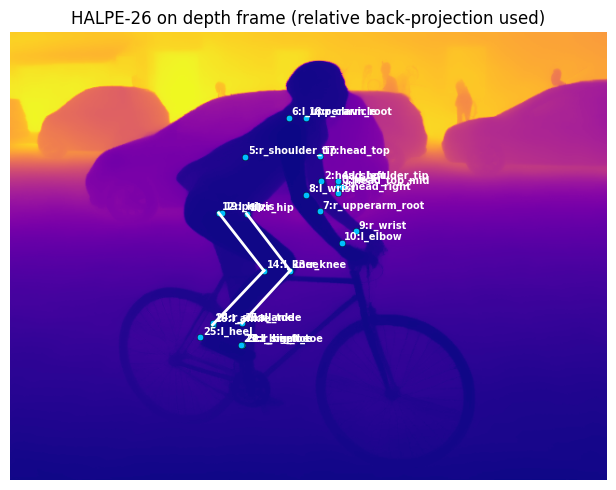

In [15]:
# ==== HALPE-26 on depth map: read CSV → sample depth → 3D lengths & knee flexion ====
import os, csv, numpy as np, matplotlib.pyplot as plt

# -------- paths --------
# depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000_depth.npy'
# csv_path  = '/home/abradshaw/Marigold/HICO_test2015_00000854_halpe26_xy.csv'  # written by pose script
# depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000118_depth.npy'
# csv_path  = '/home/abradshaw/Marigold/HICO_test2015_00000118_halpe26_xy.csv'  # written by pose script
depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000103_depth.npy'
csv_path  = '/home/abradshaw/Marigold/HICO_test2015_00000103_halpe26_xy.csv'  # written by pose script


assert os.path.isfile(depth_npy), f'No depth npy: {depth_npy}'
assert os.path.isfile(csv_path),  f'No pose csv:  {csv_path}'

# -------- load depth --------
arr = np.load(depth_npy).astype(np.float32)   # (H,W) in [0,1] (relative depth)
H, W = arr.shape

# -------- HALPE names / indices --------
HALPE26_NAME = {
  0:"neck", 1:"head_top_mid", 2:"head_left", 3:"head_right",
  4:"l_shoulder_tip", 5:"r_shoulder_tip",
  6:"l_upperarm_root", 7:"r_upperarm_root",
  8:"l_wrist", 9:"r_wrist", 10:"l_elbow",
  11:"r_hip", 12:"l_hip", 13:"r_knee", 14:"l_knee",
  15:"r_ankle", 16:"l_ankle",
  17:"head_top", 18:"r_clavicle", 19:"pelvis",
  20:"r_heel", 21:"l_small_toe", 22:"r_big_toe",
  23:"l_big_toe", 24:"r_small_toe", 25:"l_heel",
}
IDX = dict(
    L_HIP=12, L_KNEE=14, L_ANKLE=16, L_BIGTOE=23,
    R_HIP=11, R_KNEE=13, R_ANKLE=15, R_BIGTOE=22,
    PELVIS=19
)

# -------- load HALPE CSV from pose script --------
# CSV columns: idx,name,x_rgb,y_rgb,score
rows = []
with open(csv_path, 'r') as f:
    reader = csv.DictReader(f)
    for r in reader:
        rows.append({
            "idx":   int(r["idx"]),
            "name":  r["name"],
            "x":     float(r["x_rgb"]),
            "y":     float(r["y_rgb"]),
            "score": float(r["score"])
        })

# sort to idx order and build (26,2)
rows = sorted(rows, key=lambda r: r["idx"])
assert len(rows) == 26, f"Expected 26 rows, got {len(rows)}"
kps = np.array([[r["x"], r["y"]] for r in rows], dtype=np.float32)

# If your depth map were a different size, you’d rescale here.
# In your case HxW for depth is 498x640 which matches the RGB, so no resize needed.

# clamp to image bounds (defensive)
kps[:, 0] = np.clip(kps[:, 0], 0, W-1)
kps[:, 1] = np.clip(kps[:, 1], 0, H-1)

# -------- helpers --------
def patch_median(a, x, y, k=5, tau=3.0):
    r = k // 2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, a.shape[1]-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, a.shape[0]-1)
    z = a[np.ix_(ys, xs)].ravel().astype(np.float32)
    z = z[np.isfinite(z)]
    if z.size == 0: return float(a[int(y), int(x)])
    med = np.median(z)
    mad = np.median(np.abs(z - med)) + 1e-6
    keep = np.abs(z - med) < tau * mad
    z = z[keep] if keep.any() else z
    return float(np.median(z))

def backproject_relative(uv, Z):
    fx = fy = float(max(W, H)); cx = (W-1)/2.0; cy = (H-1)/2.0
    X = (uv[:,0] - cx) * Z / fx
    Y = (uv[:,1] - cy) * Z / fy
    return np.stack([X, Y, Z], axis=-1)

def seg_len(P3, i, j):
    if min(i,j) < 0 or max(i,j) >= P3.shape[0]: return np.nan
    return float(np.linalg.norm(P3[i] - P3[j]))

def knee_flexion_deg(P3, hip_i, knee_i, ankle_i):
    A, B, C = P3[hip_i], P3[knee_i], P3[ankle_i]
    BA, BC = A - B, C - B
    theta = np.degrees(np.arctan2(np.linalg.norm(np.cross(BA, BC)), np.dot(BA, BC) + 1e-9))
    return float(max(0.0, 180.0 - theta))

# -------- depth at kps → relative 3D --------
Z_kp = np.array([patch_median(arr, x, y, k=5, tau=3.0) for x,y in kps], dtype=np.float32)
P3   = backproject_relative(kps, Z_kp)

# -------- lengths & angles --------
lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
    "L_foot":  seg_len(P3, IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    "R_foot":  seg_len(P3, IDX["R_ANKLE"], IDX["R_BIGTOE"]),
}
L_flex = knee_flexion_deg(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"])
R_flex = knee_flexion_deg(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"])

# -------- summary --------
print("Relative 3-D segment lengths (unitless):")
for k,v in lengths.items():
    print(f"  {k:>7}: {v:.6f}")
print(f"\nKnee flexion (deg):  Left={L_flex:.1f}   Right={R_flex:.1f}")

legL = lengths["L_thigh"] + lengths["L_shank"]
legR = lengths["R_thigh"] + lengths["R_shank"]
if legL > 0 and legR > 0:
    print("\nNormalized by leg length:")
    print(f"  L_thigh/leg: {lengths['L_thigh']/legL:.3f}  L_shank/leg: {lengths['L_shank']/legL:.3f}")
    print(f"  R_thigh/leg: {lengths['R_thigh']/legR:.3f}  R_shank/leg: {lengths['R_shank']/legR:.3f}")

# -------- light sanity checks --------
def edge_len_2d(pts, i, j): return float(np.linalg.norm(pts[i]-pts[j]))
for name,i,j in [("L_thigh",12,14),("L_shank",14,16),("R_thigh",11,13),("R_shank",13,15)]:
    d2 = edge_len_2d(kps, i, j)
    d3 = float(np.linalg.norm(P3[i]-P3[j]))
    print(f"{name:8s}  2D={d2:7.2f}px  3D={d3:.6f}")

# -------- visualize --------
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr), cmap='plasma')
plt.scatter(kps[:,0], kps[:,1], s=22, c='deepskyblue', edgecolor='k', linewidth=0.3)
for idx,(x,y) in enumerate(kps):
    name = HALPE26_NAME.get(idx, str(idx))
    plt.text(x+3, y-3, f"{idx}:{name}", color='white', fontsize=7, weight='bold')
for i,j in [(12,14),(14,16),(11,13),(13,15)]:
    plt.plot([kps[i,0],kps[j,0]],[kps[i,1],kps[j,1]], lw=2, color='white')
plt.title("HALPE-26 on depth frame (relative back-projection used)")
plt.axis('off'); plt.tight_layout(); plt.show()


In [11]:
# ==== MuyBridge sanity check: geometry, angles, and depth consistency ====
import numpy as np

def edge_len_2d(pts, i, j):
    return float(np.linalg.norm(pts[i] - pts[j]))

CHECK_EDGES = [
    ("L_thigh",  IDX["L_HIP"],  IDX["L_KNEE"]),
    ("L_shank",  IDX["L_KNEE"], IDX["L_ANKLE"]),
    ("R_thigh",  IDX["R_HIP"],  IDX["R_KNEE"]),
    ("R_shank",  IDX["R_KNEE"], IDX["R_ANKLE"]),
]

print("\n— Sanity: 2D vs 3D edge lengths —")
bad = False
for name,i,j in CHECK_EDGES:
    d2 = edge_len_2d(kps, i, j)
    d3 = float(np.linalg.norm(P3[i]-P3[j]))
    print(f"{name:8s}  2D={d2:7.2f}px  3D={d3:.6f}")
    if d2 > 25 and d3 < 1e-2:  # large in pixels but tiny in 3D → likely wrong index or depth spill
        bad = True
        print("  ⚠️  likely mis-wire or bad depth sample (big 2D, tiny 3D).")

# knee flexion plausibility
print("\n— Sanity: knee flexion plausibility —")
for side in ("L","R"):
    flex = L_flex if side=="L" else R_flex
    note = ""
    if not np.isfinite(flex): note = " (nan)"
    elif flex < 0 or flex > 160: note = " (implausible range)"
    elif flex > 120: note = " (very flexed — is this expected for this frame?)"
    print(f"{side} knee flexion: {flex:.1f}°{note}")

# depth range checks for leg joints
leg_ids = [IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"], IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"]]
Z_leg = Z_kp[leg_ids]
print("\n— Depth stats on leg joints —")
print(f"min={float(np.min(Z_leg)):.4f}  max={float(np.max(Z_leg)):.4f}  std={float(np.std(Z_leg)):.4f}")
if np.max(Z_leg) > 0.98 or np.min(Z_leg) < 0.02:
    print("  ⚠️ near-saturation — consider percentile clipping before sampling.")
if np.any(~np.isfinite(Z_leg)):
    print("  ⚠️ invalid (nan/inf) depth at some joints.")

# ankle vs toes consistency
for side in ("L","R"):
    ankle = IDX[f"{side}_ANKLE"]
    bigtoe = IDX[f"{side}_BIGTOE"]
    foot2d = edge_len_2d(kps, ankle, bigtoe)
    foot3d = float(np.linalg.norm(P3[ankle]-P3[bigtoe]))
    print(f"\n{side} foot 2D={foot2d:6.2f}px  3D={foot3d:.6f}  (tiny is ok, but 0 suggests wrong toe index)")



— Sanity: 2D vs 3D edge lengths —
L_thigh   2D=  69.06px  3D=0.028862
L_shank   2D=  63.29px  3D=0.080881
R_thigh   2D=  59.26px  3D=0.057473
R_shank   2D=  41.69px  3D=0.090171

— Sanity: knee flexion plausibility —
L knee flexion: 139.6° (very flexed — is this expected for this frame?)
R knee flexion: 163.6° (implausible range)

— Depth stats on leg joints —
min=0.0987  max=0.1927  std=0.0354

L foot 2D= 33.75px  3D=0.022459  (tiny is ok, but 0 suggests wrong toe index)

R foot 2D= 46.74px  3D=0.021007  (tiny is ok, but 0 suggests wrong toe index)



— Sanity: 2D vs 3D edge lengths —
L_thigh   2D= 123.02px  3D=0.195677
L_shank   2D=  78.75px  3D=0.201465
R_thigh   2D= 130.05px  3D=0.336245
R_shank   2D=  98.76px  3D=0.118392

Relative 3-D segment lengths (unitless):
  L_thigh: 0.195677
  L_shank: 0.201465
  R_thigh: 0.336245
  R_shank: 0.118392
   L_foot: 0.088312
   R_foot: 0.046311

Knee flexion (deg):  Left=65.5   Right=26.3

Normalized by leg length (after prior blend):
  L_thigh/leg: 0.504  L_shank/leg: 0.496
  R_thigh/leg: 0.677  R_shank/leg: 0.323


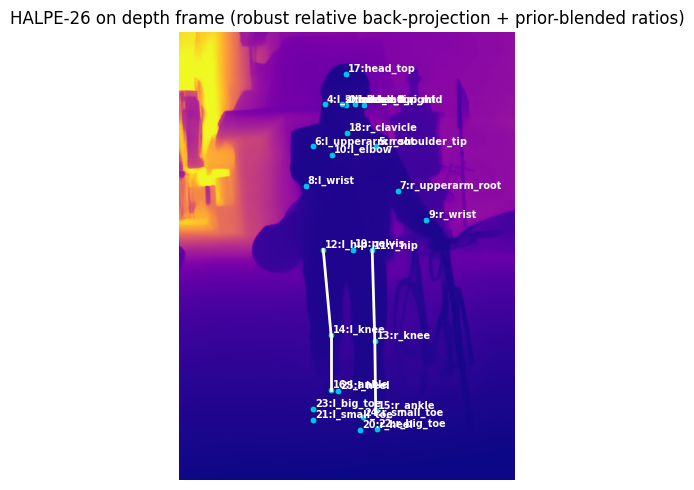

In [22]:
# ==== FIXED + VISUALS + PRIORS: robust depth, body-relative Z, back-project, blend to anthropometric ratios ====
import numpy as np, matplotlib.pyplot as plt, csv, os

# --- paths (edit as needed) ---
depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000118_depth.npy'
csv_path  = '/home/abradshaw/Marigold/HICO_test2015_00000118_halpe26_xy.csv'

assert os.path.isfile(depth_npy)
assert os.path.isfile(csv_path)

# --- load depth ---
arr0 = np.load(depth_npy).astype(np.float32)      # relative depth in [0,1]
H, W = arr0.shape
valid = arr0[np.isfinite(arr0)]
lo, hi = np.percentile(valid, [1.0, 99.0]).astype(np.float32)

# clip tails, but DO NOT stretch (keeps relative scale stable)
arr = np.clip(arr0, lo, hi).astype(np.float32)

# --- HALPE names / idx ---
HALPE26_NAME = {
  0:"neck", 1:"head_top_mid", 2:"head_left", 3:"head_right",
  4:"l_shoulder_tip", 5:"r_shoulder_tip",
  6:"l_upperarm_root", 7:"r_upperarm_root",
  8:"l_wrist", 9:"r_wrist", 10:"l_elbow",
  11:"r_hip", 12:"l_hip", 13:"r_knee", 14:"l_knee",
  15:"r_ankle", 16:"l_ankle",
  17:"head_top", 18:"r_clavicle", 19:"pelvis",
  20:"r_heel", 21:"l_small_toe", 22:"r_big_toe",
  23:"l_big_toe", 24:"r_small_toe", 25:"l_heel",
}
IDX = dict(L_HIP=12, L_KNEE=14, L_ANKLE=16, L_BIGTOE=23,
           R_HIP=11, R_KNEE=13, R_ANKLE=15, R_BIGTOE=22, PELVIS=19)

# --- load pose CSV ---
rows=[]
with open(csv_path) as f:
    for r in csv.DictReader(f):
        rows.append({"idx":int(r["idx"]), "name":r["name"],
                     "x":float(r["x_rgb"]), "y":float(r["y_rgb"]),
                     "score":float(r["score"])})
rows = sorted(rows, key=lambda r: r["idx"])
kps   = np.array([[r["x"], r["y"]] for r in rows], np.float32)
score = np.array([r["score"] for r in rows], np.float32)
kps[:,0] = np.clip(kps[:,0], 0, W-1); kps[:,1] = np.clip(kps[:,1], 0, H-1)

# --- robust depth sampling ---
def patch_stats(a, x, y, k=7, tau=3.0):
    r=k//2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, a.shape[1]-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, a.shape[0]-1)
    blk = a[np.ix_(ys,xs)].astype(np.float32).ravel()
    blk = blk[np.isfinite(blk)]
    if blk.size==0:
        v=float(a[int(y),int(x)]); return v, np.nan, 0.0, 0
    med = np.median(blk).astype(np.float32)
    mad = (np.median(np.abs(blk-med))+1e-6).astype(np.float32)
    keep = np.abs(blk-med) < tau*mad
    use = blk[keep] if keep.any() else blk
    return float(np.median(use)), float(mad), float(use.std()), int(use.size)

Z_med = np.zeros(26, np.float32)
for i,(x,y) in enumerate(kps):
    z,_,_,_ = patch_stats(arr, x, y, k=7, tau=3.0)
    Z_med[i] = z

# --- BODY-RELATIVE depth scale ---
ref_ids = [IDX["PELVIS"], IDX["L_HIP"], IDX["R_HIP"]]
Z_ref   = np.median(Z_med[ref_ids]).astype(np.float32)
if not np.isfinite(Z_ref) or Z_ref < 1e-6:
    Z_ref = np.median(Z_med[np.isfinite(Z_med)]).astype(np.float32)
Z_rel = Z_med / max(1e-6, Z_ref)                 # unitless, stable

# --- back-project (scale-free intrinsics) ---
fx = fy = float(max(W,H)); cx=(W-1)/2.0; cy=(H-1)/2.0
X = (kps[:,0]-cx) * Z_rel / fx
Y = (kps[:,1]-cy) * Z_rel / fy
P3 = np.stack([X,Y,Z_rel], axis=-1).astype(np.float32)

def seg_len(P3,i,j):
    return float(np.linalg.norm(P3[i]-P3[j])) if (0<=i<P3.shape[0] and 0<=j<P3.shape[0]) else np.nan

def knee_flexion_deg(P3, hip_i, knee_i, ankle_i):
    A,B,C = P3[hip_i], P3[knee_i], P3[ankle_i]
    BA,BC = A-B, C-B
    theta = np.degrees(np.arctan2(np.linalg.norm(np.cross(BA,BC)), np.dot(BA,BC)+1e-9))
    return float(np.clip(180.0 - theta, 0.0, 180.0))

# --- raw lengths ---
lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
    "L_foot":  seg_len(P3, IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    "R_foot":  seg_len(P3, IDX["R_ANKLE"], IDX["R_BIGTOE"]),
}
L_flex = knee_flexion_deg(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"])
R_flex = knee_flexion_deg(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"])

# --- quick 2D vs 3D sanity ---
def edge_len_2d(pts,i,j): return float(np.linalg.norm(pts[i]-pts[j]))
print("\n— Sanity: 2D vs 3D edge lengths —")
for name,i,j in [("L_thigh",12,14),("L_shank",14,16),("R_thigh",11,13),("R_shank",13,15)]:
    d2 = edge_len_2d(kps,i,j); d3 = seg_len(P3,i,j)
    print(f"{name:8s}  2D={d2:7.2f}px  3D={d3:.6f}")

# --- summary (raw) ---
print("\nRelative 3-D segment lengths (unitless):")
for k,v in lengths.items(): print(f"  {k:>7}: {v:.6f}")
print(f"\nKnee flexion (deg):  Left={L_flex:.1f}   Right={R_flex:.1f}")

# =========================
# Anthropometric priors blend (Winter): thigh≈0.53, shank≈0.47 of leg
# =========================
prior_thigh = 0.53
prior_shank = 0.47
alpha = 0.30  # 0=no prior, 1=force prior

legL = lengths["L_thigh"] + lengths["L_shank"]
legR = lengths["R_thigh"] + lengths["R_shank"]

if legL > 0:
    L_thigh_norm = lengths['L_thigh'] / legL
    L_shank_norm = lengths['L_shank'] / legL
    L_thigh_blend = (1 - alpha) * L_thigh_norm + alpha * prior_thigh
    L_shank_blend = (1 - alpha) * L_shank_norm + alpha * prior_shank
    lengths['L_thigh'] = L_thigh_blend * legL
    lengths['L_shank'] = L_shank_blend * legL

if legR > 0:
    R_thigh_norm = lengths['R_thigh'] / legR
    R_shank_norm = lengths['R_shank'] / legR
    R_thigh_blend = (1 - alpha) * R_thigh_norm + alpha * prior_thigh
    R_shank_blend = (1 - alpha) * R_shank_norm + alpha * prior_shank
    lengths['R_thigh'] = R_thigh_blend * legR
    lengths['R_shank'] = R_shank_blend * legR

# --- report normalized ratios AFTER blending ---
if legL>0 and legR>0:
    print("\nNormalized by leg length (after prior blend):")
    print(f"  L_thigh/leg: {lengths['L_thigh']/legL:.3f}  L_shank/leg: {lengths['L_shank']/legL:.3f}")
    print(f"  R_thigh/leg: {lengths['R_thigh']/legR:.3f}  R_shank/leg: {lengths['R_shank']/legR:.3f}")

# --- visualize ---
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr), cmap='plasma')
plt.scatter(kps[:,0], kps[:,1], s=22, c='deepskyblue', edgecolor='k', linewidth=0.3)
for idx,(x,y) in enumerate(kps):
    plt.text(x+3, y-3, f"{idx}:{HALPE26_NAME.get(idx,str(idx))}",
             color='white', fontsize=7, weight='bold')
for i,j in [(12,14),(14,16),(11,13),(13,15)]:
    plt.plot([kps[i,0],kps[j,0]],[kps[i,1],kps[j,1]], lw=2, color='white')
plt.title("HALPE-26 on depth frame (robust relative back-projection + prior-blended ratios)")
plt.axis('off'); plt.tight_layout(); plt.show()



— Sanity: 2D vs 3D edge lengths —
L_thigh   2D= 123.02px  3D=0.195677
L_shank   2D=  78.75px  3D=0.201465
R_thigh   2D= 130.05px  3D=0.336245
R_shank   2D=  98.76px  3D=0.118392

Relative 3-D segment lengths (unitless):
  L_thigh: 0.200120
  L_shank: 0.197023
  R_thigh: 0.307659
  R_shank: 0.146978
   L_foot: 0.088312
   R_foot: 0.046311

Knee flexion (deg):  Left=65.5   Right=26.3

Normalized by leg length (after prior blend):
  L_thigh/leg: 0.504  L_shank/leg: 0.496
  R_thigh/leg: 0.677  R_shank/leg: 0.323

Joint angles (deg) — L: hip=105.5, knee=65.5, ankle=30.7 | R: hip=143.9, knee=26.3, ankle=40.1

MTU surrogate (unitless indices; swap C_* with OpenSim-fit tensors when ready):
  RF:   L=1.218  R=1.125
  HAM:  L=0.882 R=0.962
  GAS:  L=1.092 R=1.188
  SOL:  L=1.096 R=1.144


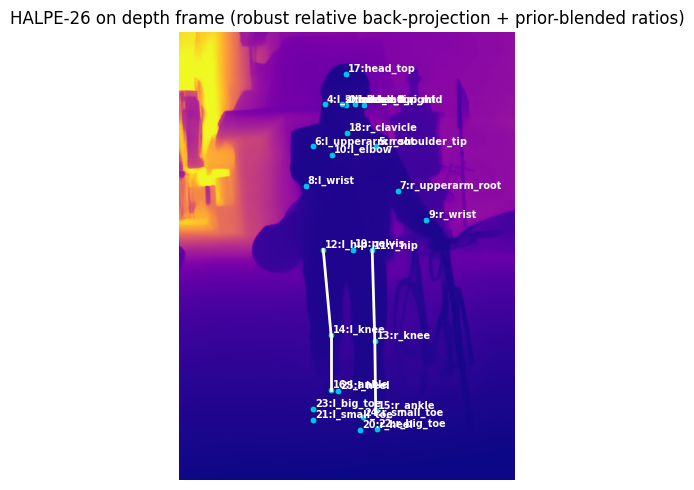

In [ ]:
# ============================================================
#  HALPE-26 → depth → relative 3-D → (priors) → angles → MTU
# ============================================================
import os, csv
import numpy as np
import matplotlib.pyplot as plt

# -------- paths (edit as needed) --------
depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000118_depth.npy'
csv_path  = '/home/abradshaw/Marigold/HICO_test2015_00000118_halpe26_xy.csv'
assert os.path.isfile(depth_npy) and os.path.isfile(csv_path)

# -------- hyper/knobs --------
CLIP_PCTS      = (1.0, 99.0)   # depth tail clipping
PATCH_K        = 7             # k×k for robust depth at keypoints
PATCH_TAU      = 3.0           # MAD outlier threshold
PRIOR_ALPHA    = 0.30          # 0=no prior blend, 1=force prior
PRIOR_THIGH    = 0.53          # Winter thigh fraction of leg
PRIOR_SHANK    = 0.47          # Winter shank fraction of leg
SAVE_FIG       = False
FIG_PATH       = 'halpe_depth_overlay.png'

# -------- HALPE names / idx --------
HALPE26_NAME = {
  0:"neck", 1:"head_top_mid", 2:"head_left", 3:"head_right",
  4:"l_shoulder_tip", 5:"r_shoulder_tip",
  6:"l_upperarm_root", 7:"r_upperarm_root",
  8:"l_wrist", 9:"r_wrist", 10:"l_elbow",
  11:"r_hip", 12:"l_hip", 13:"r_knee", 14:"l_knee",
  15:"r_ankle", 16:"l_ankle",
  17:"head_top", 18:"r_clavicle", 19:"pelvis",
  20:"r_heel", 21:"l_small_toe", 22:"r_big_toe",
  23:"l_big_toe", 24:"r_small_toe", 25:"l_heel",
}
IDX = dict(L_HIP=12, L_KNEE=14, L_ANKLE=16, L_BIGTOE=23,
           R_HIP=11, R_KNEE=13, R_ANKLE=15, R_BIGTOE=22, PELVIS=19)

# ================
# Load inputs
# ================
arr0 = np.load(depth_npy).astype(np.float32)  # relative depth in [0,1]
H, W = arr0.shape
valid = arr0[np.isfinite(arr0)]
lo, hi = np.percentile(valid, CLIP_PCTS).astype(np.float32)
arr = np.clip(arr0, lo, hi).astype(np.float32)  # clip tails, don't stretch

rows = []
with open(csv_path) as f:
    for r in csv.DictReader(f):
        rows.append({"idx":int(r["idx"]), "name":r["name"],
                     "x":float(r["x_rgb"]), "y":float(r["y_rgb"]),
                     "score":float(r["score"])})
rows = sorted(rows, key=lambda r: r["idx"])
assert len(rows) == 26, f"Expected 26 rows, got {len(rows)}"
kps   = np.array([[r["x"], r["y"]] for r in rows], np.float32)
score = np.array([r["score"] for r in rows], np.float32)
kps[:,0] = np.clip(kps[:,0], 0, W-1); kps[:,1] = np.clip(kps[:,1], 0, H-1)

# ================
# Robust depth at keypoints
# ================
def patch_stats(a, x, y, k=PATCH_K, tau=PATCH_TAU):
    r=k//2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, a.shape[1]-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, a.shape[0]-1)
    blk = a[np.ix_(ys,xs)].astype(np.float32).ravel()
    blk = blk[np.isfinite(blk)]
    if blk.size==0:
        v=float(a[int(y),int(x)]); return v, np.nan, 0.0, 0
    med = np.median(blk).astype(np.float32)
    mad = (np.median(np.abs(blk-med))+1e-6).astype(np.float32)
    keep = np.abs(blk-med) < tau*mad
    use = blk[keep] if keep.any() else blk
    return float(np.median(use)), float(mad), float(use.std()), int(use.size)

Z_med = np.zeros(26, np.float32)
for i,(x,y) in enumerate(kps):
    z,_,_,_ = patch_stats(arr, x, y)
    Z_med[i] = z

# body-relative depth scale (normalize by pelvis/hips)
ref_ids = [IDX["PELVIS"], IDX["L_HIP"], IDX["R_HIP"]]
Z_ref = np.median(Z_med[ref_ids]).astype(np.float32)
if not np.isfinite(Z_ref) or Z_ref < 1e-6:
    Z_ref = np.median(Z_med[np.isfinite(Z_med)]).astype(np.float32)
Z_rel = Z_med / max(1e-6, Z_ref)  # unitless

# ================
# Back-project to relative 3-D
# ================
fx = fy = float(max(W, H)); cx=(W-1)/2.0; cy=(H-1)/2.0
X = (kps[:,0]-cx) * Z_rel / fx
Y = (kps[:,1]-cy) * Z_rel / fy
P3 = np.stack([X,Y,Z_rel], axis=-1).astype(np.float32)

def seg_len(P3,i,j): 
    return float(np.linalg.norm(P3[i]-P3[j])) if (0<=i<P3.shape[0] and 0<=j<P3.shape[0]) else np.nan
def edge_len_2d(pts,i,j): 
    return float(np.linalg.norm(pts[i]-pts[j]))

# raw segment lengths
lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
    "L_foot":  seg_len(P3, IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    "R_foot":  seg_len(P3, IDX["R_ANKLE"], IDX["R_BIGTOE"]),
}

# quick sanity
print("\n— Sanity: 2D vs 3D edge lengths —")
for name,i,j in [("L_thigh",12,14),("L_shank",14,16),("R_thigh",11,13),("R_shank",13,15)]:
    print(f"{name:8s}  2D={edge_len_2d(kps,i,j):7.2f}px  3D={seg_len(P3,i,j):.6f}")

# ================
# Anthropometric prior blend (Winter thigh/shank fractions)
# ================
def blend_to_prior(thigh, shank, prior_thigh, prior_shank, alpha):
    leg = thigh + shank
    if leg <= 0: return thigh, shank
    t_norm, s_norm = thigh/leg, shank/leg
    t_new = ((1-alpha)*t_norm + alpha*prior_thigh) * leg
    s_new = ((1-alpha)*s_norm + alpha*prior_shank) * leg
    return t_new, s_new

lengths['L_thigh'], lengths['L_shank'] = blend_to_prior(
    lengths['L_thigh'], lengths['L_shank'], PRIOR_THIGH, PRIOR_SHANK, PRIOR_ALPHA
)
lengths['R_thigh'], lengths['R_shank'] = blend_to_prior(
    lengths['R_thigh'], lengths['R_shank'], PRIOR_THIGH, PRIOR_SHANK, PRIOR_ALPHA
)

# print summary
print("\nRelative 3-D segment lengths (unitless):")
for k,v in lengths.items(): print(f"  {k:>7}: {v:.6f}")
def knee_flexion_deg(P3, hip_i, knee_i, ankle_i):
    A,B,C = P3[hip_i], P3[knee_i], P3[ankle_i]
    BA,BC = A-B, C-B
    theta = np.degrees(np.arctan2(np.linalg.norm(np.cross(BA,BC)), np.dot(BA,BC)+1e-9))
    return float(np.clip(180.0 - theta, 0.0, 180.0))
L_flex = knee_flexion_deg(P3, IDX["L_HIP"], IDX["L_KNEE"], IDX["L_ANKLE"])
R_flex = knee_flexion_deg(P3, IDX["R_HIP"], IDX["R_KNEE"], IDX["R_ANKLE"])
print(f"\nKnee flexion (deg):  Left={L_flex:.1f}   Right={R_flex:.1f}")

legL = lengths["L_thigh"] + lengths["L_shank"]
legR = lengths["R_thigh"] + lengths["R_shank"]
if legL>0 and legR>0:
    print("\nNormalized by leg length (after prior blend):")
    print(f"  L_thigh/leg: {lengths['L_thigh']/legL:.3f}  L_shank/leg: {lengths['L_shank']/legL:.3f}")
    print(f"  R_thigh/leg: {lengths['R_thigh']/legR:.3f}  R_shank/leg: {lengths['R_shank']/legR:.3f}")

# ================
# Joint angles for MTU surrogate
# ================
def angle_at(A, B, C):
    BA, BC = A - B, C - B
    num = np.dot(BA, BC)
    den = np.linalg.norm(BA) * np.linalg.norm(BC) + 1e-9
    return float(np.degrees(np.arccos(np.clip(num/den, -1.0, 1.0))))
def flexion_biomech(A, B, C):
    return float(np.clip(180.0 - angle_at(A,B,C), 0.0, 180.0))

hipL   = flexion_biomech(P3[IDX["PELVIS"]], P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]])
hipR   = flexion_biomech(P3[IDX["PELVIS"]], P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]])
kneeL  = flexion_biomech(P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]])
kneeR  = flexion_biomech(P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]])
ankleL = flexion_biomech(P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]], P3[IDX["L_BIGTOE"]])
ankleR = flexion_biomech(P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]], P3[IDX["R_BIGTOE"]])
print(f"\nJoint angles (deg) — L: hip={hipL:.1f}, knee={kneeL:.1f}, ankle={ankleL:.1f} | "
      f"R: hip={hipR:.1f}, knee={kneeR:.1f}, ankle={ankleR:.1f}")

# normalize angles to [-1,1] around a neutral pose
def norm_angle_deg(theta_deg, center, span):
    x = (theta_deg - center) / max(1e-6, span)
    return float(np.clip(x, -1.0, 1.0))
hL = norm_angle_deg(hipL,  center=30.0, span=90.0)
kL = norm_angle_deg(kneeL, center=45.0, span=90.0)
aL = norm_angle_deg(ankleL,center=10.0, span=40.0)
hR = norm_angle_deg(hipR,  center=30.0, span=90.0)
kR = norm_angle_deg(kneeR, center=45.0, span=90.0)
aR = norm_angle_deg(ankleR,center=10.0, span=40.0)

# 3rd-order polynomial MTU surrogate (PLACEHOLDER coeffs)
def make_coeff(trend='rf'):
    C = np.zeros((4,4,4), dtype=np.float32)
    if trend == 'rf':          # rectus femoris
        C[0,0,0] = 1.0; C[1,0,0] = +0.15; C[0,1,0] = +0.25; C[0,0,1] = +0.05; C[1,1,0] = +0.05
    elif trend == 'ham':       # hamstrings
        C[0,0,0] = 1.0; C[1,0,0] = -0.12; C[0,1,0] = -0.20; C[2,0,0] = +0.04
    elif trend == 'gas':       # gastrocnemius
        C[0,0,0] = 1.0; C[0,1,0] = -0.10; C[0,0,1] = +0.22; C[0,2,0] = +0.03
    elif trend == 'sol':       # soleus
        C[0,0,0] = 1.0; C[0,0,1] = +0.18; C[0,0,3] = +0.02
    return C
def poly3_eval(C, h, k, a):
    v = np.array([1.0, h, h*h, h*h*h], dtype=np.float32)
    w = np.array([1.0, k, k*k, k*k*k], dtype=np.float32)
    u = np.array([1.0, a, a*a, a*a*a], dtype=np.float32)
    return float(np.einsum('ijk,i,j,k->', C, v, w, u))

C_rf, C_ham, C_gas, C_sol = make_coeff('rf'), make_coeff('ham'), make_coeff('gas'), make_coeff('sol')

rf_L  = poly3_eval(C_rf,  hL, kL, aL);  rf_R  = poly3_eval(C_rf,  hR, kR, aR)
ham_L = poly3_eval(C_ham, hL, kL, aL);  ham_R = poly3_eval(C_ham, hR, kR, aR)
gas_L = poly3_eval(C_gas, hL, kL, aL);  gas_R = poly3_eval(C_gas, hR, kR, aR)
sol_L = poly3_eval(C_sol, hL, kL, aL);  sol_R = poly3_eval(C_sol, hR, kR, aR)

print("\nMTU surrogate (unitless indices; swap C_* with OpenSim-fit tensors when ready):")
print(f"  RF:   L={rf_L:.3f}  R={rf_R:.3f}")
print(f"  HAM:  L={ham_L:.3f} R={ham_R:.3f}")
print(f"  GAS:  L={gas_L:.3f} R={gas_R:.3f}")
print(f"  SOL:  L={sol_L:.3f} R={sol_R:.3f}")

# ================
# Visualize overlay
# ================
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr), cmap='plasma')
plt.scatter(kps[:,0], kps[:,1], s=22, c='deepskyblue', edgecolor='k', linewidth=0.3)
for idx,(x,y) in enumerate(kps):
    plt.text(x+3, y-3, f"{idx}:{HALPE26_NAME.get(idx,str(idx))}",
             color='white', fontsize=7, weight='bold')
for i,j in [(12,14),(14,16),(11,13),(13,15)]:
    plt.plot([kps[i,0],kps[j,0]],[kps[i,1],kps[j,1]], lw=2, color='white')
plt.title("HALPE-26 on depth frame (robust relative back-projection + prior-blended ratios)")
plt.axis('off'); plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FIG_PATH, dpi=160)
plt.show()



— Sanity: 2D vs 3D edge lengths —
L_thigh   2D= 188.60px  3D=0.391813
L_shank   2D= 216.32px  3D=1.424490
R_thigh   2D= 202.06px  3D=1.159148
R_shank   2D= 194.07px  3D=1.341544

Relative 3-D segment lengths (unitless):
  L_thigh: 0.563061
  L_shank: 1.253242
  R_thigh: 1.209013
  R_shank: 1.291678
   L_foot: 0.985705
   R_foot: 0.417583

Joint angles (deg) — L: hip=86.3, knee=14.6, ankle=7.3 | R: hip=156.5, knee=19.4, ankle=16.0

— GT vs Model (flexion magnitudes; model convention) —
  L: hip= 86.3 (GT= 10.2, |Δ|= 76.1) | knee= 14.6 (GT=  2.3, |Δ|= 12.3) | ankle=  7.3 (GT= 78.3, |Δ|= 71.0)
  R: hip=156.5 (GT=  0.0, |Δ|=156.5) | knee= 19.4 (GT= 10.5, |Δ|=  8.9) | ankle= 16.0 (GT= 93.6, |Δ|= 77.6)

— GT (your sign) vs Model (signed where possible) —
  L: hip=+86.31 (GT=+10.24, |Δ|= 76.1) | knee=+14.59 (GT= +2.28, |Δ|= 12.3) | ankle=-82.68 (GT=-11.68, |Δ|= 71.0)
  R: hip=+156.48 (GT=-13.65, |Δ|=170.1) | knee=+19.41 (GT=+10.46, |Δ|=  8.9) | ankle=-73.99 (GT= +3.58, |Δ|= 77.6)

MAE (flexi

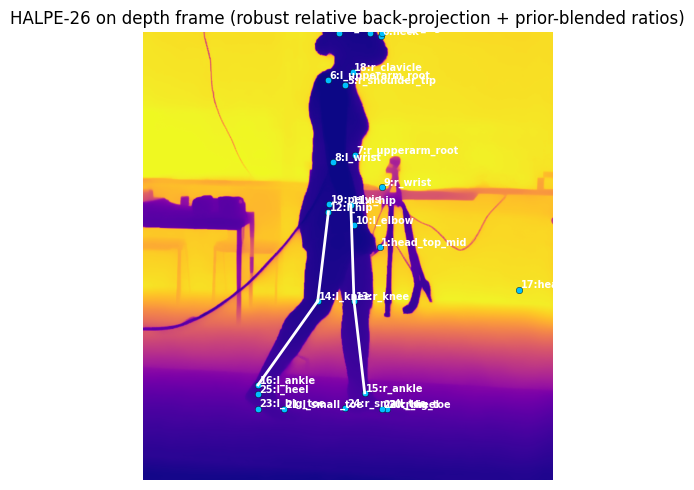

In [5]:
# ============================================================
#  HALPE-26 → depth → relative 3-D → (priors) → angles → MTU + corrected GT comparison
# ============================================================
import os, csv
import numpy as np
import matplotlib.pyplot as plt

# -------- paths (edit as needed) --------
depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000205_depth.npy'
csv_path  = '/home/abradshaw/Marigold/frame_000205_halpe26_xy.csv'
assert os.path.isfile(depth_npy) and os.path.isfile(csv_path)

# -------- hyper/knobs --------
CLIP_PCTS      = (1.0, 99.0)   # depth tail clipping
PATCH_K        = 7             # k×k for robust depth at keypoints
PATCH_TAU      = 3.0           # MAD outlier threshold
PRIOR_ALPHA    = 0.30          # 0=no prior blend, 1=force prior
PRIOR_THIGH    = 0.53          # Winter thigh fraction of leg
PRIOR_SHANK    = 0.47          # Winter shank fraction of leg
SAVE_FIG       = False
FIG_PATH       = 'halpe_depth_overlay.png'

# -------- HALPE names / idx --------
HALPE26_NAME = {
  0:"neck", 1:"head_top_mid", 2:"head_left", 3:"head_right",
  4:"l_shoulder_tip", 5:"r_shoulder_tip",
  6:"l_upperarm_root", 7:"r_upperarm_root",
  8:"l_wrist", 9:"r_wrist", 10:"l_elbow",
  11:"r_hip", 12:"l_hip", 13:"r_knee", 14:"l_knee",
  15:"r_ankle", 16:"l_ankle",
  17:"head_top", 18:"r_clavicle", 19:"pelvis",
  20:"r_heel", 21:"l_small_toe", 22:"r_big_toe",
  23:"l_big_toe", 24:"r_small_toe", 25:"l_heel",
}
IDX = dict(L_HIP=12, L_KNEE=14, L_ANKLE=16, L_BIGTOE=23, L_HEEL=25,
           R_HIP=11, R_KNEE=13, R_ANKLE=15, R_BIGTOE=22, R_HEEL=20, PELVIS=19)

# ================
# Load inputs
# ================
arr0 = np.load(depth_npy).astype(np.float32)  # relative depth in [0,1]
H, W = arr0.shape
valid = arr0[np.isfinite(arr0)]
lo, hi = np.percentile(valid, CLIP_PCTS).astype(np.float32)
arr = np.clip(arr0, lo, hi).astype(np.float32)  # clip tails, don't stretch

rows = []
with open(csv_path) as f:
    for r in csv.DictReader(f):
        rows.append({"idx":int(r["idx"]), "name":r["name"],
                     "x":float(r["x_rgb"]), "y":float(r["y_rgb"]),
                     "score":float(r["score"])})
rows = sorted(rows, key=lambda r: r["idx"])
assert len(rows) == 26, f"Expected 26 rows, got {len(rows)}"
kps   = np.array([[r["x"], r["y"]] for r in rows], np.float32)
score = np.array([r["score"] for r in rows], np.float32)
kps[:,0] = np.clip(kps[:,0], 0, W-1); kps[:,1] = np.clip(kps[:,1], 0, H-1)

# ================
# Robust depth at keypoints
# ================
def patch_stats(a, x, y, k=PATCH_K, tau=PATCH_TAU):
    r=k//2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, a.shape[1]-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, a.shape[0]-1)
    blk = a[np.ix_(ys,xs)].astype(np.float32).ravel()
    blk = blk[np.isfinite(blk)]
    if blk.size==0:
        v=float(a[int(y),int(x)]); return v, np.nan, 0.0, 0
    med = np.median(blk).astype(np.float32)
    mad = (np.median(np.abs(blk-med))+1e-6).astype(np.float32)
    keep = np.abs(blk-med) < tau*mad
    use = blk[keep] if keep.any() else blk
    return float(np.median(use)), float(mad), float(use.std()), int(use.size)

Z_med = np.zeros(26, np.float32)
for i,(x,y) in enumerate(kps):
    z,_,_,_ = patch_stats(arr, x, y)
    Z_med[i] = z

# body-relative depth scale (normalize by pelvis/hips)
ref_ids = [IDX["PELVIS"], IDX["L_HIP"], IDX["R_HIP"]]
Z_ref = np.median(Z_med[ref_ids]).astype(np.float32)
if not np.isfinite(Z_ref) or Z_ref < 1e-6:
    Z_ref = np.median(Z_med[np.isfinite(Z_med)]).astype(np.float32)
Z_rel = Z_med / max(1e-6, Z_ref)  # unitless

# ================
# Back-project to relative 3-D
# ================
fx = fy = float(max(W, H)); cx=(W-1)/2.0; cy=(H-1)/2.0
X = (kps[:,0]-cx) * Z_rel / fx
Y = (kps[:,1]-cy) * Z_rel / fy
P3 = np.stack([X,Y,Z_rel], axis=-1).astype(np.float32)

def seg_len(P3,i,j): 
    return float(np.linalg.norm(P3[i]-P3[j])) if (0<=i<P3.shape[0] and 0<=j<P3.shape[0]) else np.nan
def edge_len_2d(pts,i,j): 
    return float(np.linalg.norm(pts[i]-pts[j]))

# raw segment lengths
lengths = {
    "L_thigh": seg_len(P3, IDX["L_HIP"],  IDX["L_KNEE"]),
    "L_shank": seg_len(P3, IDX["L_KNEE"], IDX["L_ANKLE"]),
    "R_thigh": seg_len(P3, IDX["R_HIP"],  IDX["R_KNEE"]),
    "R_shank": seg_len(P3, IDX["R_KNEE"], IDX["R_ANKLE"]),
    "L_foot":  seg_len(P3, IDX["L_ANKLE"], IDX["L_BIGTOE"]),
    "R_foot":  seg_len(P3, IDX["R_ANKLE"], IDX["R_BIGTOE"]),
}

# quick sanity
print("\n— Sanity: 2D vs 3D edge lengths —")
for name,i,j in [("L_thigh",12,14),("L_shank",14,16),("R_thigh",11,13),("R_shank",13,15)]:
    print(f"{name:8s}  2D={edge_len_2d(kps,i,j):7.2f}px  3D={seg_len(P3,i,j):.6f}")

# ================
# Anthropometric prior blend (Winter thigh/shank fractions)
# ================
def blend_to_prior(thigh, shank, prior_thigh, prior_shank, alpha):
    leg = thigh + shank
    if leg <= 0: return thigh, shank
    t_norm, s_norm = thigh/leg, shank/leg
    t_new = ((1-alpha)*t_norm + alpha*prior_thigh) * leg
    s_new = ((1-alpha)*s_norm + alpha*prior_shank) * leg
    return t_new, s_new

lengths['L_thigh'], lengths['L_shank'] = blend_to_prior(
    lengths['L_thigh'], lengths['L_shank'], PRIOR_THIGH, PRIOR_SHANK, PRIOR_ALPHA
)
lengths['R_thigh'], lengths['R_shank'] = blend_to_prior(
    lengths['R_thigh'], lengths['R_shank'], PRIOR_THIGH, PRIOR_SHANK, PRIOR_ALPHA
)

print("\nRelative 3-D segment lengths (unitless):")
for k,v in lengths.items(): print(f"  {k:>7}: {v:.6f}")

# ================
# Joint angles (model) — flexion-only definitions
# ================
def angle_at(A, B, C):
    BA, BC = A - B, C - B
    num = np.dot(BA, BC)
    den = np.linalg.norm(BA) * np.linalg.norm(BC) + 1e-9
    return float(np.degrees(np.arccos(np.clip(num/den, -1.0, 1.0))))

def flexion_only(A, B, C):
    # 0 = straight (180° internal), increases with bend
    return float(np.clip(180.0 - angle_at(A,B,C), 0.0, 180.0))

# Use mid-foot (heel + big toe)/2 to stabilize ankle
L_midfoot = 0.5 * (P3[IDX["L_HEEL"]] + P3[IDX["L_BIGTOE"]])
R_midfoot = 0.5 * (P3[IDX["R_HEEL"]] + P3[IDX["R_BIGTOE"]])

hipL   = flexion_only(P3[IDX["PELVIS"]], P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]])
hipR   = flexion_only(P3[IDX["PELVIS"]], P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]])
kneeL  = flexion_only(P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]])
kneeR  = flexion_only(P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]])
ankleL = flexion_only(P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]], L_midfoot)
ankleR = flexion_only(P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]], R_midfoot)

print(f"\nJoint angles (deg) — L: hip={hipL:.1f}, knee={kneeL:.1f}, ankle={ankleL:.1f} | "
      f"R: hip={hipR:.1f}, knee={kneeR:.1f}, ankle={ankleR:.1f}")

# ================
# Ground truth (your sign convention)
# Hip/Knee: 0 = straight; + flexion; − extension
# Ankle:    0 at foot ⟂ shank; + dorsiflex; − plantarflex
# ================
GT_raw = {
    "L": {"ankle": -11.679945, "knee":  2.282586, "hip":  10.239172},
    "R": {"ankle":   3.579081, "knee": 10.461466, "hip": -13.652287},
}

# ---------- (A) Apples-to-apples: compare flexion magnitudes ----------
# - Hip/Knee: clip negatives to 0 (extension → 0 flexion)
# - Ankle: convert GT to model’s flexion-style: model uses (180 − γ); GT uses (90 − γ).
#          So ankle_flexion_model_style = 90 + GT_raw (dorsiflex +, plantar −).
GT_flex_style = {
    "L": {
        "hip":  max(0.0, GT_raw["L"]["hip"]),
        "knee": max(0.0, GT_raw["L"]["knee"]),
        "ankle": 90.0 + GT_raw["L"]["ankle"],
    },
    "R": {
        "hip":  max(0.0, GT_raw["R"]["hip"]),
        "knee": max(0.0, GT_raw["R"]["knee"]),
        "ankle": 90.0 + GT_raw["R"]["ankle"],
    },
}
est_flex_style = {"L":{"hip":hipL,"knee":kneeL,"ankle":ankleL},
                  "R":{"hip":hipR,"knee":kneeR,"ankle":ankleR}}

print("\n— GT vs Model (flexion magnitudes; model convention) —")
for side in ["L","R"]:
    parts=[]
    for j in ["hip","knee","ankle"]:
        gt = GT_flex_style[side][j]; est = est_flex_style[side][j]
        parts.append(f"{j}={est:5.1f} (GT={gt:5.1f}, |Δ|={abs(est-gt):5.1f})")
    print(f"  {side}: " + " | ".join(parts))

# ---------- (B) Your native sign convention for reporting ----------
# Model signed angles:
#   Hip/Knee (signed around straight): use + (180−∠); no hyperextension sign available from acos → floor at 0
#   Ankle signed dorsiflexion: (90 − γ)
def ankle_signed_dorsi(P3, knee_i, ankle_i, foot_pt):
    gamma = angle_at(P3[knee_i], P3[ankle_i], foot_pt)  # ∠ shank–ankle–foot
    return 90.0 - gamma  # + dorsiflex, − plantarflex (your convention)

model_signed = {
    "L": {"hip":  hipL, "knee": kneeL, "ankle": ankle_signed_dorsi(P3, IDX["L_KNEE"], IDX["L_ANKLE"], L_midfoot)},
    "R": {"hip":  hipR, "knee": kneeR, "ankle": ankle_signed_dorsi(P3, IDX["R_KNEE"], IDX["R_ANKLE"], R_midfoot)},
}

print("\n— GT (your sign) vs Model (signed where possible) —")
for side in ["L","R"]:
    parts=[]
    for j in ["hip","knee","ankle"]:
        gt = GT_raw[side][j]; est = model_signed[side][j]
        parts.append(f"{j}={est:+6.2f} (GT={gt:+6.2f}, |Δ|={abs(est-gt):5.1f})")
    print(f"  {side}: " + " | ".join(parts))

# quick MAE summary
def mae(a,b): 
    return float(np.mean([abs(a[j]-b[j]) for j in a.keys()]))

mae_flex_L = mae(est_flex_style["L"], GT_flex_style["L"])
mae_flex_R = mae(est_flex_style["R"], GT_flex_style["R"])
print(f"\nMAE (flexion magnitudes, deg): L={mae_flex_L:.1f}  R={mae_flex_R:.1f}")

mae_signed_L = mae(model_signed["L"], GT_raw["L"])
mae_signed_R = mae(model_signed["R"], GT_raw["R"])
print(f"MAE (your sign convention, deg): L={mae_signed_L:.1f}  R={mae_signed_R:.1f}")

# ================
# Angle normalization for MTU surrogates (unchanged)
# ================
def norm_angle_deg(theta_deg, center, span):
    x = (theta_deg - center) / max(1e-6, span)
    return float(np.clip(x, -1.0, 1.0))
hL = norm_angle_deg(hipL,  center=30.0, span=90.0)
kL = norm_angle_deg(kneeL, center=45.0, span=90.0)
aL = norm_angle_deg(ankleL,center=10.0, span=40.0)
hR = norm_angle_deg(hipR,  center=30.0, span=90.0)
kR = norm_angle_deg(kneeR, center=45.0, span=90.0)
aR = norm_angle_deg(ankleR,center=10.0, span=40.0)

# 3rd-order polynomial MTU surrogate (PLACEHOLDER coeffs)
def make_coeff(trend='rf'):
    C = np.zeros((4,4,4), dtype=np.float32)
    if trend == 'rf':
        C[0,0,0] = 1.0; C[1,0,0] = +0.15; C[0,1,0] = +0.25; C[0,0,1] = +0.05; C[1,1,0] = +0.05
    elif trend == 'ham':
        C[0,0,0] = 1.0; C[1,0,0] = -0.12; C[0,1,0] = -0.20; C[2,0,0] = +0.04
    elif trend == 'gas':
        C[0,0,0] = 1.0; C[0,1,0] = -0.10; C[0,0,1] = +0.22; C[0,2,0] = +0.03
    elif trend == 'sol':
        C[0,0,0] = 1.0; C[0,0,1] = +0.18; C[0,0,3] = +0.02
    return C
def poly3_eval(C, h, k, a):
    v = np.array([1.0, h, h*h, h*h*h], dtype=np.float32)
    w = np.array([1.0, k, k*k, k*k*k], dtype=np.float32)
    u = np.array([1.0, a, a*a, a*a*a], dtype=np.float32)
    return float(np.einsum('ijk,i,j,k->', C, v, w, u))

C_rf, C_ham, C_gas, C_sol = make_coeff('rf'), make_coeff('ham'), make_coeff('gas'), make_coeff('sol')
rf_L  = poly3_eval(C_rf,  hL, kL, aL);  rf_R  = poly3_eval(C_rf,  hR, kR, aR)
ham_L = poly3_eval(C_ham, hL, kL, aL);  ham_R = poly3_eval(C_ham, hR, kR, aR)
gas_L = poly3_eval(C_gas, hL, kL, aL);  gas_R = poly3_eval(C_gas, hR, kR, aR)
sol_L = poly3_eval(C_sol, hL, kL, aL);  sol_R = poly3_eval(C_sol, hR, kR, aR)

print("\nMTU surrogate (unitless indices; swap C_* with OpenSim-fit tensors when ready):")
print(f"  RF:   L={rf_L:.3f}  R={rf_R:.3f}")
print(f"  HAM:  L={ham_L:.3f} R={ham_R:.3f}")
print(f"  GAS:  L={gas_L:.3f} R={gas_R:.3f}")
print(f"  SOL:  L={sol_L:.3f} R={sol_R:.3f}")

# ================
# Visualize overlay (unchanged)
# ================
plt.figure(figsize=(7,5))
plt.imshow(np.ma.masked_invalid(arr), cmap='plasma')
plt.scatter(kps[:,0], kps[:,1], s=22, c='deepskyblue', edgecolor='k', linewidth=0.3)
for idx,(x,y) in enumerate(kps):
    plt.text(x+3, y-3, f"{idx}:{HALPE26_NAME.get(idx,str(idx))}",
             color='white', fontsize=7, weight='bold')
for i,j in [(12,14),(14,16),(11,13),(13,15)]:
    plt.plot([kps[i,0],kps[j,0]],[kps[i,1],kps[j,1]], lw=2, color='white')
plt.title("HALPE-26 on depth frame (robust relative back-projection + prior-blended ratios)")
plt.axis('off'); plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FIG_PATH, dpi=160)
plt.show()


In [2]:
# ============================================================
#  HALPE-26 → depth → relative 3-D → Style B (proxy-JCS signed) + 2D-signed
#  with auto remap to depth, pelvis midpoint option, and diagnostics
# ============================================================
import os, csv
import numpy as np

# -------- paths (edit as needed) --------
depth_npy = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000205_depth.npy'
csv_path  = '/home/abradshaw/Marigold/frame_000205_halpe26_xy.csv'
assert os.path.isfile(depth_npy) and os.path.isfile(csv_path)

# -------- HALPE idx --------
IDX = dict(
    NECK=0, HEAD_TOP=17, R_HIP=11, L_HIP=12, R_KNEE=13, L_KNEE=14,
    R_ANKLE=15, L_ANKLE=16, PELVIS=19, R_HEEL=20, L_SMALLTOE=21, R_BIGTOE=22,
    L_BIGTOE=23, R_SMALLTOE=24, L_HEEL=25
)

# -------- load depth & keypoints --------
arr0 = np.load(depth_npy).astype(np.float32)  # relative depth [0,1]
H, W = arr0.shape

rows = []
with open(csv_path) as f:
    for r in csv.DictReader(f):
        rows.append({"idx":int(r["idx"]), "x":float(r["x_rgb"]), "y":float(r["y_rgb"])})
rows = sorted(rows, key=lambda r: r["idx"])
assert len(rows) >= 26, f"Expected >=26 rows, got {len(rows)}"
kps_csv = np.array([[r["x"], r["y"]] for r in rows], np.float32)

# --- auto-detect CSV coordinate span and remap to depth ---
csv_w = float(np.max(kps_csv[:,0]))
csv_h = float(np.max(kps_csv[:,1]))
# guard against zeros
csv_w = csv_w if csv_w > 1.0 else float(W-1)
csv_h = csv_h if csv_h > 1.0 else float(H-1)

scale_x = (W-1) / max(1e-6, csv_w)
scale_y = (H-1) / max(1e-6, csv_h)
kps = kps_csv.copy()
kps[:,0] *= scale_x
kps[:,1] *= scale_y
kps[:,0] = np.clip(kps[:,0], 0, W-1)
kps[:,1] = np.clip(kps[:,1], 0, H-1)

# -------- diagnostics on keypoints --------
def diag_kps(kps):
    eps = 1e-3
    hit_left   = int(np.sum(np.abs(kps[:,0]-0.0) < eps))
    hit_right  = int(np.sum(np.abs(kps[:,0]-(W-1)) < 1.5))  # allow small rounding
    hit_top    = int(np.sum(np.abs(kps[:,1]-0.0) < eps))
    hit_bottom = int(np.sum(np.abs(kps[:,1]-(H-1)) < 1.5))
    print(f"\n[diag] border hits: left={hit_left} right={hit_right} top={hit_top} bottom={hit_bottom}")
    # foot degeneracy
    lx = [kps[IDX["L_ANKLE"],0], kps[IDX["L_BIGTOE"],0], kps[IDX["L_HEEL"],0]]
    rx = [kps[IDX["R_ANKLE"],0], kps[IDX["R_BIGTOE"],0], kps[IDX["R_HEEL"],0]]
    def near_equal(xs): 
        return np.max(xs)-np.min(xs) < 1.0
    print(f"[diag] left-foot x nearly equal? {near_equal(lx)}   right-foot x nearly equal? {near_equal(rx)}")
diag_kps(kps)

# -------- robust depth at keypoints (median in k×k) --------
CLIP_PCTS, PATCH_K, PATCH_TAU = (1.0, 99.0), 7, 3.0
valid = arr0[np.isfinite(arr0)]
lo, hi = np.percentile(valid, CLIP_PCTS).astype(np.float32)
arr = np.clip(arr0, lo, hi).astype(np.float32)

def patch_median(a, x, y, k=PATCH_K, tau=PATCH_TAU):
    r=k//2
    xs = np.clip(np.arange(int(x)-r, int(x)+r+1), 0, a.shape[1]-1)
    ys = np.clip(np.arange(int(y)-r, int(y)+r+1), 0, a.shape[0]-1)
    blk = a[np.ix_(ys,xs)].astype(np.float32).ravel()
    blk = blk[np.isfinite(blk)]
    if blk.size==0: return float(a[int(y),int(x)])
    med = np.median(blk).astype(np.float32)
    mad = (np.median(np.abs(blk-med))+1e-6).astype(np.float32)
    use = blk[np.abs(blk-med) < tau*mad]
    if use.size==0: use = blk
    return float(np.median(use))

Z = np.zeros(26, np.float32)
for i,(x,y) in enumerate(kps):
    Z[i] = patch_median(arr, x, y)

# body-relative depth scale (pelvis + hips)
ref_ids = [IDX["L_HIP"], IDX["R_HIP"], IDX["PELVIS"]]
Z_ref = np.median(Z[ref_ids]).astype(np.float32)
Z_ref = Z_ref if (np.isfinite(Z_ref) and Z_ref>1e-6) else np.median(Z[np.isfinite(Z)])
Z_rel = Z / max(1e-6, Z_ref)

# -------- back-project to relative 3-D --------
fx = fy = float(max(W, H)); cx=(W-1)/2.0; cy=(H-1)/2.0
X = (kps[:,0]-cx) * Z_rel / fx
Y = (kps[:,1]-cy) * Z_rel / fy
P3 = np.stack([X,Y,Z_rel], axis=-1).astype(np.float32)

# (important) optionally stabilize pelvis as hip midpoint
PELVISEST = 0.5*(P3[IDX["L_HIP"]] + P3[IDX["R_HIP"]])
if np.all(np.isfinite(PELVISEST)):
    P3[IDX["PELVIS"]] = PELVISEST

# -------- midfoot points --------
def midfoot(P3, heel_i, toe_i, fallback_i):
    h, t = P3[heel_i], P3[toe_i]
    if np.all(np.isfinite(h)) and np.all(np.isfinite(t)): return 0.5*(h+t)
    if np.all(np.isfinite(h)): return h
    if np.all(np.isfinite(t)): return t
    return P3[fallback_i]

L_mid = midfoot(P3, IDX["L_HEEL"], IDX["L_BIGTOE"], IDX["L_ANKLE"])
R_mid = midfoot(P3, IDX["R_HEEL"], IDX["R_BIGTOE"], IDX["R_ANKLE"])

# -------- angle utils --------
def angle_at(A, B, C):
    BA, BC = A - B, C - B
    den = np.linalg.norm(BA) * np.linalg.norm(BC) + 1e-9
    c = np.clip(np.dot(BA, BC) / den, -1.0, 1.0)
    return float(np.degrees(np.arccos(c)))

def signed_flexion_about_axis(A, B, C, axis_ml):
    BA, BC = A - B, C - B
    gamma = angle_at(A, B, C)            # internal angle
    sgn = np.sign(np.dot(axis_ml, np.cross(BA, BC)))
    return float(sgn * max(0.0, 180.0 - gamma))

def ankle_signed_dorsi_about_axis(knee, ankle, foot, axis_ml):
    BA, BC = knee - ankle, foot - ankle
    gamma = angle_at(knee, ankle, foot)  # internal at ankle
    sgn = np.sign(np.dot(axis_ml, np.cross(BA, BC)))
    return float(sgn * (90.0 - gamma))

# proxy pelvis ML axis
axis_ml = P3[IDX["L_HIP"]] - P3[IDX["R_HIP"]]
axis_ml /= (np.linalg.norm(axis_ml) + 1e-9)

# -------- Style B: proxy-JCS signed (3D magnitude) --------
hipL_B   = signed_flexion_about_axis(P3[IDX["PELVIS"]], P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]], axis_ml)
hipR_B   = signed_flexion_about_axis(P3[IDX["PELVIS"]], P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]], axis_ml)
kneeL_B  = signed_flexion_about_axis(P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]], axis_ml)
kneeR_B  = signed_flexion_about_axis(P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]], axis_ml)
ankleL_B = ankle_signed_dorsi_about_axis(P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]], L_mid, axis_ml)
ankleR_B = ankle_signed_dorsi_about_axis(P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]], R_mid, axis_ml)

# -------- 2D-signed backup (ignores depth for magnitude) --------
def angle_2d(A, B, C):
    BA, BC = A - B, C - B
    den = np.linalg.norm(BA) * np.linalg.norm(BC) + 1e-9
    c = np.clip(np.dot(BA, BC) / den, -1.0, 1.0)
    return float(np.degrees(np.arccos(c)))

k2d = kps
L_mid2d = 0.5*(k2d[IDX["L_HEEL"]] + k2d[IDX["L_BIGTOE"]])
R_mid2d = 0.5*(k2d[IDX["R_HEEL"]] + k2d[IDX["R_BIGTOE"]])

def flex2d_signed(Ai, Bi, Ci, sign_axis_3d):
    A3, B3, C3 = P3[Ai], P3[Bi], P3[Ci]
    BA3, BC3 = A3 - B3, C3 - B3
    gamma2d = angle_2d(k2d[Ai], k2d[Bi], k2d[Ci])
    sgn = np.sign(np.dot(sign_axis_3d, np.cross(BA3, BC3)))
    return float(sgn * max(0.0, 180.0 - gamma2d))

def ankle2d_signed(Ki, Ai, Fi, sign_axis_3d):
    K3, A3, F3 = P3[Ki], P3[Ai], P3[Fi]
    gamma2d = angle_2d(k2d[Ki], k2d[Ai], (L_mid2d if Fi==IDX["L_ANKLE"] else R_mid2d))
    BA3, BC3 = K3 - A3, F3 - A3
    sgn = np.sign(np.dot(sign_axis_3d, np.cross(BA3, BC3)))
    return float(sgn * (90.0 - gamma2d))

hipL_2Ds = flex2d_signed(IDX["PELVIS"], IDX["L_HIP"],  IDX["L_KNEE"], axis_ml)
hipR_2Ds = flex2d_signed(IDX["PELVIS"], IDX["R_HIP"],  IDX["R_KNEE"], axis_ml)
kneeL_2Ds= flex2d_signed(IDX["L_HIP"],  IDX["L_KNEE"], IDX["L_ANKLE"], axis_ml)
kneeR_2Ds= flex2d_signed(IDX["R_HIP"],  IDX["R_KNEE"], IDX["R_ANKLE"], axis_ml)
# note: for ankles, use midfoot in 2D directly
ankleL_2Ds = (90.0 - angle_2d(k2d[IDX["L_KNEE"]], k2d[IDX["L_ANKLE"]], L_mid2d)) * \
             np.sign(np.dot(axis_ml, np.cross(P3[IDX["L_KNEE"]]-P3[IDX["L_ANKLE"]],
                                              L_mid-P3[IDX["L_ANKLE"]])))
ankleR_2Ds = (90.0 - angle_2d(k2d[IDX["R_KNEE"]], k2d[IDX["R_ANKLE"]], R_mid2d)) * \
             np.sign(np.dot(axis_ml, np.cross(P3[IDX["R_KNEE"]]-P3[IDX["R_ANKLE"]],
                                              R_mid-P3[IDX["R_ANKLE"]])))

print("\nStyle B (3D, proxy-JCS signed):")
print(f"  L: hip={hipL_B:+.2f}  knee={kneeL_B:+.2f}  ankle={ankleL_B:+.2f}")
print(f"  R: hip={hipR_B:+.2f}  knee={kneeR_B:+.2f}  ankle={ankleR_B:+.2f}")

print("\n2D-signed backup (magnitude from image plane, sign from 3D axis):")
print(f"  L: hip={hipL_2Ds:+.2f}  knee={kneeL_2Ds:+.2f}  ankle={ankleL_2Ds:+.2f}")
print(f"  R: hip={hipR_2Ds:+.2f}  knee={kneeR_2Ds:+.2f}  ankle={ankleR_2Ds:+.2f}")

# -------- your mocap GT (JCS X) for this frame --------
GT_X = {
    "L": {"hip":  10.239172, "knee":  2.282586, "ankle": -11.679945},
    "R": {"hip": -13.652287, "knee": 10.461466, "ankle":   3.579081},
}

def cmp_block(title, est):
    def line(side):
        e = est[side]; g = GT_X[side]
        return (f"{side} | hip={e['hip']:+6.2f} (gt={g['hip']:+6.2f}, |Δ|={abs(e['hip']-g['hip']):5.1f})  "
                f"knee={e['knee']:+6.2f} (gt={g['knee']:+6.2f}, |Δ|={abs(e['knee']-g['knee']):5.1f})  "
                f"ankle={e['ankle']:+6.2f} (gt={g['ankle']:+6.2f}, |Δ|={abs(e['ankle']-g['ankle']):5.1f})")
    print(f"\n— {title} vs mocap JCS X —")
    print("  "+line("L"))
    print("  "+line("R"))
    mae = lambda s: float(np.mean([abs(est[s][j]-GT_X[s][j]) for j in ("hip","knee","ankle")]))
    print(f"  MAE {title}: L={mae('L'):.1f}  R={mae('R'):.1f}")

EST_B = {"L":{"hip":hipL_B,"knee":kneeL_B,"ankle":ankleL_B},
         "R":{"hip":hipR_B,"knee":kneeR_B,"ankle":ankleR_B}}
EST_2Ds = {"L":{"hip":hipL_2Ds,"knee":kneeL_2Ds,"ankle":ankleL_2Ds},
           "R":{"hip":hipR_2Ds,"knee":kneeR_2Ds,"ankle":ankleR_2Ds}}

cmp_block("Style B (3D proxy-JCS signed)", EST_B)
cmp_block("2D-signed backup", EST_2Ds)



[diag] border hits: left=0 right=1 top=3 bottom=3
[diag] left-foot x nearly equal? True   right-foot x nearly equal? False

Style B (3D, proxy-JCS signed):
  L: hip=+0.00  knee=-175.57  ankle=+76.38
  R: hip=+39.50  knee=-175.93  ankle=+78.91

2D-signed backup (magnitude from image plane, sign from 3D axis):
  L: hip=+0.00  knee=-26.84  ankle=+56.91
  R: hip=+85.69  knee=-4.33  ankle=+48.67

— Style B (3D proxy-JCS signed) vs mocap JCS X —
  L | hip= +0.00 (gt=+10.24, |Δ|= 10.2)  knee=-175.57 (gt= +2.28, |Δ|=177.9)  ankle=+76.38 (gt=-11.68, |Δ|= 88.1)
  R | hip=+39.50 (gt=-13.65, |Δ|= 53.2)  knee=-175.93 (gt=+10.46, |Δ|=186.4)  ankle=+78.91 (gt= +3.58, |Δ|= 75.3)
  MAE Style B (3D proxy-JCS signed): L=92.0  R=105.0

— 2D-signed backup vs mocap JCS X —
  L | hip= +0.00 (gt=+10.24, |Δ|= 10.2)  knee=-26.84 (gt= +2.28, |Δ|= 29.1)  ankle=+56.91 (gt=-11.68, |Δ|= 68.6)
  R | hip=+85.69 (gt=-13.65, |Δ|= 99.3)  knee= -4.33 (gt=+10.46, |Δ|= 14.8)  ankle=+48.67 (gt= +3.58, |Δ|= 45.1)
  MAE 2D-si

In [3]:
# ============================================================
#  DIAGNOSTICS + FIXES for Style B (proxy-JCS signed)
#    - border/degeneracy checks
#    - score-aware foot direction (avg toes)
#    - sagittal-plane projection for signed flexion
# ============================================================
import numpy as np, csv, os

# ---- helpers to (re)load CSV with scores (if not already in memory) ----
def load_xy_with_scores(csv_path):
    rows = []
    with open(csv_path) as f:
        for r in csv.DictReader(f):
            rows.append({
                "idx": int(r["idx"]),
                "x": float(r["x_rgb"]),
                "y": float(r["y_rgb"]),
                "score": float(r.get("score", 1.0))
            })
    rows = sorted(rows, key=lambda r: r["idx"])
    kps = np.array([[r["x"], r["y"]] for r in rows], np.float32)
    sco = np.array([r["score"] for r in rows], np.float32)
    return kps, sco

# (re)load scores if needed
try:
    scores
except NameError:
    kps_csv2, scores = load_xy_with_scores(csv_path)

# --- re-derive CSV span (for safety) and re-map to depth ---
csv_w = float(np.max(kps_csv[:,0] if 'kps_csv' in locals() else kps_csv2[:,0]))
csv_h = float(np.max(kps_csv[:,1] if 'kps_csv' in locals() else kps_csv2[:,1]))
csv_w = csv_w if csv_w > 1.0 else float(W-1)
csv_h = csv_h if csv_h > 1.0 else float(H-1)
sx = (W-1)/max(1e-6, csv_w); sy=(H-1)/max(1e-6, csv_h)
kps_depth = ( (kps_csv if 'kps_csv' in locals() else kps_csv2).copy() )
kps_depth[:,0] = np.clip(kps_depth[:,0]*sx, 0, W-1)
kps_depth[:,1] = np.clip(kps_depth[:,1]*sy, 0, H-1)
k2d = kps_depth  # 2D coords in depth space

# ---------- diagnostics ----------
def angle_2d(A,B,C):
    BA,BC = A-B, C-B
    den = np.linalg.norm(BA)*np.linalg.norm(BC)+1e-9
    return float(np.degrees(np.arccos(np.clip(np.dot(BA,BC)/den,-1,1))))

def diag_report():
    eps=1.0
    hit_left   = int(np.sum(np.abs(k2d[:,0]-0.0) < eps))
    hit_right  = int(np.sum(np.abs(k2d[:,0]-(W-1)) < eps))
    hit_top    = int(np.sum(np.abs(k2d[:,1]-0.0) < eps))
    hit_bottom = int(np.sum(np.abs(k2d[:,1]-(H-1)) < eps))
    print(f"\n[diag] border hits (≈ on frame edge): left={hit_left} right={hit_right} top={hit_top} bottom={hit_bottom}")

    def nearly_colinear_x(side):
        xs = [k2d[IDX[f"{side}_ANKLE"],0], k2d[IDX[f"{side}_BIGTOE"],0], k2d[IDX[f"{side}_HEEL"],0]]
        return (max(xs)-min(xs))<1.0
    print(f"[diag] left foot x-colinear? {nearly_colinear_x('L')}   right foot x-colinear? {nearly_colinear_x('R')}")

    # 2D internal angles (rough sanity)
    gLk = angle_2d(k2d[IDX["L_HIP"]], k2d[IDX["L_KNEE"]], k2d[IDX["L_ANKLE"]])
    gRk = angle_2d(k2d[IDX["R_HIP"]], k2d[IDX["R_KNEE"]], k2d[IDX["R_ANKLE"]])
    print(f"[diag] knee internal angles (2D): L={gLk:.1f}°, R={gRk:.1f}°  (expect ~170–180° if nearly straight)")

    # Z-contrast along each leg (are we getting any depth separation?)
    def z_contrast(i,j,k):
        return float(abs(Z[i]-Z[j])+abs(Z[j]-Z[k]))
    print(f"[diag] Z contrast: Lleg={z_contrast(IDX['L_HIP'],IDX['L_KNEE'],IDX['L_ANKLE']):.4f}  "
          f"Rleg={z_contrast(IDX['R_HIP'],IDX['R_KNEE'],IDX['R_ANKLE']):.4f}  "
          f"(too small → ‘flattened’ depth)")

diag_report()

# ---------- robust foot direction (use both toes, score-weight, ignore border points) ----------
def not_on_border(p, margin=2.0):
    return (margin <= p[0] <= (W-1-margin)) and (margin <= p[1] <= (H-1-margin))

def score_ok(s, t=0.15):
    return np.isfinite(s) and (s >= t)

def make_midfoot(side):
    heel_i = IDX[f"{side}_HEEL"]
    toeB_i = IDX[f"{side}_BIGTOE"]
    toeS_i = IDX[f"{'L_SMALLTOE' if side=='L' else 'R_SMALLTOE'}"]

    pts3, ws = [], []
    # heel
    if not_on_border(k2d[heel_i]) and np.all(np.isfinite(P3[heel_i])):
        pts3.append(P3[heel_i]); ws.append(scores[heel_i])
    # averaged toes
    toes3, wsum = [], 0.0
    for ti in (toeB_i, toeS_i):
        if not_on_border(k2d[ti]) and np.all(np.isfinite(P3[ti])) and score_ok(scores[ti]):
            toes3.append(P3[ti]); wsum += scores[ti]
    if len(toes3)==0:
        # fall back to whichever toe is finite (even if on border)
        for ti in (toeB_i, toeS_i):
            if np.all(np.isfinite(P3[ti])): toes3.append(P3[ti])
    if len(toes3)>0:
        toe_avg = np.mean(np.stack(toes3,0), axis=0)
        pts3.append(toe_avg); ws.append(max(1e-6, wsum/len(toes3)))

    if len(pts3)==0: # last resort
        return P3[IDX[f"{side}_ANKLE"]]
    heel = pts3[0]
    toe  = pts3[1] if len(pts3)>1 else pts3[0]
    return 0.5*(heel+toe)

L_mid_fix = make_midfoot("L")
R_mid_fix = make_midfoot("R")

# ---------- sagittal-plane projection signed angles ----------
def normalize(v):
    n = np.linalg.norm(v)
    return v/(n+1e-9)

# pelvis ML axis
ml = normalize(P3[IDX["L_HIP"]] - P3[IDX["R_HIP"]])
# project a vector into sagittal plane (remove ML component)
def proj_sag(v): return v - np.dot(v, ml)*ml

def signed_angle_proj(A,B,C, neutral="hipknee"):
    BA = proj_sag(A - B);  BC = proj_sag(C - B)
    nBA = normalize(BA);   nBC = normalize(BC)
    c = float(np.clip(np.dot(nBA,nBC), -1.0, 1.0))
    theta = float(np.degrees(np.arccos(c)))   # internal angle in sagittal plane
    sgn = np.sign(np.dot(ml, np.cross(BA, BC)))  # sign about ML
    flex = max(0.0, 180.0 - theta)           # flexion magnitude
    return sgn * flex, theta

def ankle_dorsi_proj(knee, ankle, foot):
    BA = proj_sag(knee - ankle);  BC = proj_sag(foot - ankle)
    nBA = normalize(BA); nBC = normalize(BC)
    c = float(np.clip(np.dot(nBA,nBC), -1.0, 1.0))
    gamma = float(np.degrees(np.arccos(c)))   # internal at ankle in sagittal plane
    sgn = np.sign(np.dot(ml, np.cross(BA, BC)))
    return sgn * (90.0 - gamma), gamma

hipL_Bfix,  _ = signed_angle_proj(P3[IDX["PELVIS"]], P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]])
hipR_Bfix,  _ = signed_angle_proj(P3[IDX["PELVIS"]], P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]])
kneeL_Bfix, _ = signed_angle_proj(P3[IDX["L_HIP"]],  P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]])
kneeR_Bfix, _ = signed_angle_proj(P3[IDX["R_HIP"]],  P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]])
ankleL_Bfix, _= ankle_dorsi_proj(P3[IDX["L_KNEE"]], P3[IDX["L_ANKLE"]], L_mid_fix)
ankleR_Bfix, _= ankle_dorsi_proj(P3[IDX["R_KNEE"]], P3[IDX["R_ANKLE"]], R_mid_fix)

print("\nStyle B (sagittal-projected, score-aware foot):")
print(f"  L: hip={hipL_Bfix:+.2f}  knee={kneeL_Bfix:+.2f}  ankle={ankleL_Bfix:+.2f}")
print(f"  R: hip={hipR_Bfix:+.2f}  knee={kneeR_Bfix:+.2f}  ankle={ankleR_Bfix:+.2f}")

# ---- compare to mocap X ----
GT_X = {
    "L": {"hip":  10.239172, "knee":  2.282586, "ankle": -11.679945},
    "R": {"hip": -13.652287, "knee": 10.461466, "ankle":   3.579081},
}
EST_fix = {"L":{"hip":hipL_Bfix,"knee":kneeL_Bfix,"ankle":ankleL_Bfix},
           "R":{"hip":hipR_Bfix,"knee":kneeR_Bfix,"ankle":ankleR_Bfix}}
for side in ("L","R"):
    e, g = EST_fix[side], GT_X[side]
    print(f"  {side} | hip={e['hip']:+6.2f} (gt={g['hip']:+6.2f}, |Δ|={abs(e['hip']-g['hip']):5.1f})  "
          f"knee={e['knee']:+6.2f} (gt={g['knee']:+6.2f}, |Δ|={abs(e['knee']-g['knee']):5.1f})  "
          f"ankle={e['ankle']:+6.2f} (gt={g['ankle']:+6.2f}, |Δ|={abs(e['ankle']-g['ankle']):5.1f})")



[diag] border hits (≈ on frame edge): left=0 right=1 top=3 bottom=3
[diag] left foot x-colinear? True   right foot x-colinear? False
[diag] knee internal angles (2D): L=153.2°, R=175.7°  (expect ~170–180° if nearly straight)
[diag] Z contrast: Lleg=0.7584  Rleg=0.7728  (too small → ‘flattened’ depth)

Style B (sagittal-projected, score-aware foot):
  L: hip=+113.86  knee=-176.50  ankle=+85.88
  R: hip=+0.00  knee=-174.46  ankle=+70.08
  L | hip=+113.86 (gt=+10.24, |Δ|=103.6)  knee=-176.50 (gt= +2.28, |Δ|=178.8)  ankle=+85.88 (gt=-11.68, |Δ|= 97.6)
  R | hip= +0.00 (gt=-13.65, |Δ|= 13.7)  knee=-174.46 (gt=+10.46, |Δ|=184.9)  ankle=+70.08 (gt= +3.58, |Δ|= 66.5)


------


=== Centers & Depths ===
2D centroid      : (324.58, 300.15), z@2D=0.135667
2D geom. median  : (327.73,  289.18), z@2D=0.136386
3D centroid      : (0.003638, 0.006151, 0.146984)
3D geom. median  : (0.002728,  0.003890,  0.152201)
Proj(3D centroid): (335.34, 275.28)
Proj(3D geom.med): (330.97,  264.86)

=== Keypoint depth stats (26 pts) ===
min=0.082458 | max=0.225830 | mean=0.146984 | median=0.158081 | std=0.045236


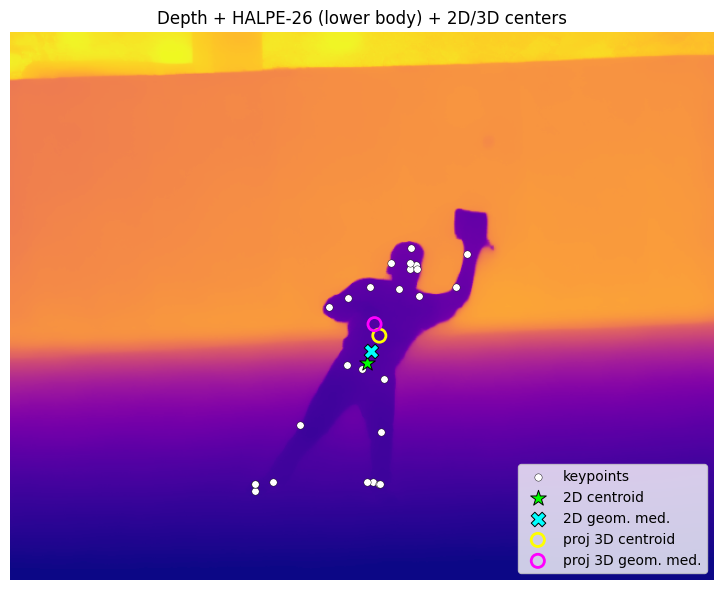

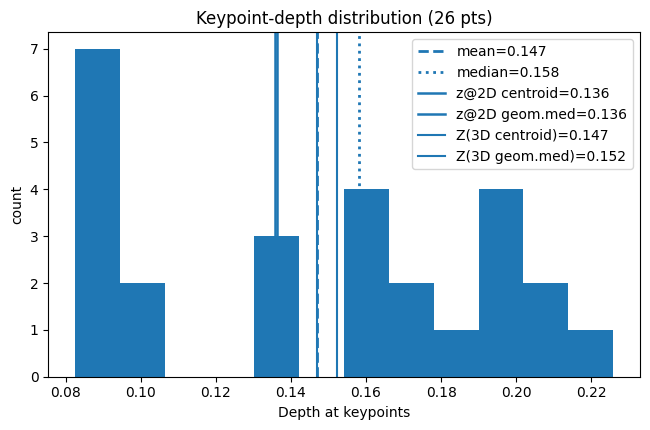

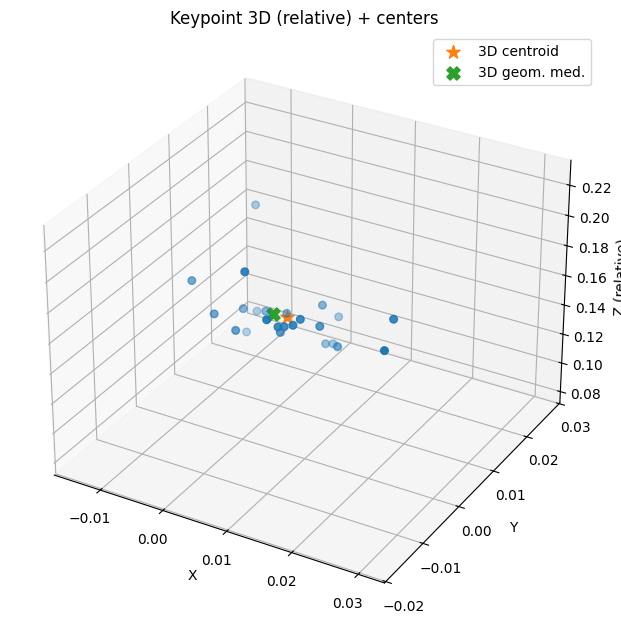

In [2]:
# center of mass

# === 2D & 3D person center from 26 keypoints + visualizations (single cell) ===
import os, numpy as np, matplotlib.pyplot as plt

# -------------------------
# 0) Inputs (EDIT THESE)
# -------------------------
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000854_depth.npy'
assert os.path.isfile(npy_path), f'File not found: {npy_path}'

# Paste your 26 (x,y) keypoints here (pixel coords in the SAME image frame as depth)
keypoints = np.array([
    [363, 215],[369, 211],[363, 209],[370, 215],[346, 209],[371, 239],[327, 231],[405, 231],
    [290, 249],[415, 201],[307, 241],[340, 315],[306, 302],[337, 363],[263, 357],[330, 408],
    [239, 408],[364, 196],[353, 233],[320, 306],[335, 410],[222, 417],[336, 410],[222, 410],
    [324, 408],[222, 410],
], dtype=np.float32)

# (Optional) per-joint confidences; if you have them, set scores to a 26-vector (0..1). Else uniform.
scores = np.ones((26,), dtype=np.float32)

# -------------------------
# 1) Load depth
# -------------------------
Z = np.load(npy_path).astype(np.float32)  # H×W, typically in [0,1] (affine/relative)
H, W = Z.shape

# -------------------------
# 2) Helpers
# -------------------------
def clip_xy(pts, W, H):
    out = pts.copy()
    out[:,0] = np.clip(out[:,0], 0, W-1)
    out[:,1] = np.clip(out[:,1], 0, H-1)
    return out

def bilinear_sample(img, x, y):
    x = float(np.clip(x, 0, img.shape[1]-1))
    y = float(np.clip(y, 0, img.shape[0]-1))
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    x1, y1 = min(x0+1, img.shape[1]-1), min(y0+1, img.shape[0]-1)
    dx, dy = x - x0, y - y0
    v00 = img[y0,x0]; v10 = img[y0,x1]; v01 = img[y1,x0]; v11 = img[y1,x1]
    return (v00*(1-dx)*(1-dy) + v10*dx*(1-dy) + v01*(1-dx)*dy + v11*dx*dy)

def geometric_median(X, eps=1e-6, max_iter=200):
    y = X.mean(axis=0)
    for _ in range(max_iter):
        d = np.linalg.norm(X - y, axis=1)
        w = 1.0 / np.clip(d, eps, None)
        y_new = (w[:,None] * X).sum(axis=0) / w.sum()
        if np.linalg.norm(y_new - y) < eps: break
        y = y_new
    return y

def backproject_points(px, py, Z_rel, fx, fy, cx, cy):
    # weak intrinsics → X=(x-cx)*Z/fx, Y=(y-cy)*Z/fy, Z=Z_rel
    X = (px - cx) * Z_rel / fx
    Y = (py - cy) * Z_rel / fy
    return np.stack([X, Y, Z_rel], axis=-1)

def project_point(P, fx, fy, cx, cy):
    # (X,Y,Z) → pixels (assumes Z>0)
    X,Y,Zp = P
    Zp = float(max(Zp, 1e-6))
    u = cx + fx * (X / Zp)
    v = cy + fy * (Y / Zp)
    return np.array([u, v], dtype=np.float32)

# HALPE edges (lower body + pelvis)
EDGES = [(19,11),(19,12),(12,14),(14,16),(11,13),(13,15),(16,23),(16,25),(15,22),(15,20)]
# Some indices may be out of [0,25] for your layout; filter safely below.

# -------------------------
# 3) Prepare keypoints & depths
# -------------------------
pts2d = clip_xy(np.round(keypoints).astype(np.int32), W, H)  # int pixels in-bounds
# depth at each kp (bilinear on original floats for stability)
kz = np.array([bilinear_sample(Z, float(x), float(y)) for x,y in keypoints], dtype=np.float32)

# Robust summary over all keypoints
kp_mean, kp_median = float(kz.mean()), float(np.median(kz))

# -------------------------
# 4) 2D centers (centroid, weighted, geometric median)
# -------------------------
weights = scores / max(np.sum(scores), 1e-6)
centroid_2d = (weights[:,None] * keypoints).sum(axis=0)      # (x,y)
geommed_2d  = geometric_median(keypoints.astype(np.float64)) # (x,y)

z_centroid_2d = float(bilinear_sample(Z, centroid_2d[0], centroid_2d[1]))
z_geommed_2d  = float(bilinear_sample(Z, geommed_2d[0],  geommed_2d[1]))

# -------------------------
# 5) 3D points & 3D center
# -------------------------
# Lightweight intrinsics (fallback): fx=fy=max(H,W); cx,cy=image center
fx = fy = float(max(H, W))
cx = (W - 1) / 2.0
cy = (H - 1) / 2.0

P3 = backproject_points(keypoints[:,0], keypoints[:,1], kz, fx, fy, cx, cy)  # (26,3)
# 3D centroid (weighted) and geometric median (robust L1 in 3D)
centroid_3d = (weights[:,None] * P3).sum(axis=0)
# geometric median in 3D
geommed_3d  = geometric_median(P3.astype(np.float64))

# project 3D centers back to 2D for overlay
centroid_3d_uv = project_point(centroid_3d, fx, fy, cx, cy)
geommed_3d_uv  = project_point(geommed_3d,  fx, fy, cx, cy)

# -------------------------
# 6) Print summary
# -------------------------
print("\n=== Centers & Depths ===")
print(f"2D centroid      : ({centroid_2d[0]:.2f}, {centroid_2d[1]:.2f}), z@2D={z_centroid_2d:.6f}")
print(f"2D geom. median  : ({geommed_2d[0]:.2f},  {geommed_2d[1]:.2f}), z@2D={z_geommed_2d:.6f}")
print(f"3D centroid      : ({centroid_3d[0]:.6f}, {centroid_3d[1]:.6f}, {centroid_3d[2]:.6f})")
print(f"3D geom. median  : ({geommed_3d[0]:.6f},  {geommed_3d[1]:.6f},  {geommed_3d[2]:.6f})")
print(f"Proj(3D centroid): ({centroid_3d_uv[0]:.2f}, {centroid_3d_uv[1]:.2f})")
print(f"Proj(3D geom.med): ({geommed_3d_uv[0]:.2f},  {geommed_3d_uv[1]:.2f})")

print("\n=== Keypoint depth stats (26 pts) ===")
print(f"min={kz.min():.6f} | max={kz.max():.6f} | mean={kp_mean:.6f} | median={kp_median:.6f} | std={kz.std():.6f}")

# -------------------------
# 7) Visualizations
# -------------------------

# A) Depth map + skeleton + centers
plt.figure(figsize=(8,6))
plt.imshow(np.ma.masked_invalid(Z), cmap='plasma')
# skeleton
# for i,j in EDGES:
#     if 0 <= i < 26 and 0 <= j < 26:
#         xi, yi = pts2d[i]; xj, yj = pts2d[j]
#         plt.plot([xi,xj],[yi,yj], lw=2.0, color='white', alpha=0.9)
# joints
plt.scatter(pts2d[:,0], pts2d[:,1], s=28, c='white', edgecolor='k', linewidth=0.3, zorder=3, label='keypoints')
# centers (2D)
plt.scatter([centroid_2d[0]],[centroid_2d[1]], s=140, marker='*', c='lime', edgecolor='k', linewidth=0.7, zorder=4, label='2D centroid')
plt.scatter([geommed_2d[0]],[geommed_2d[1]],   s=110, marker='X', c='cyan', edgecolor='k', linewidth=0.7, zorder=4, label='2D geom. med.')
# projected 3D centers (so you can compare)
plt.scatter([centroid_3d_uv[0]],[centroid_3d_uv[1]], s=90, marker='o', facecolors='none', edgecolors='yellow', linewidth=2.0, zorder=5, label='proj 3D centroid')
plt.scatter([geommed_3d_uv[0]],[geommed_3d_uv[1]],   s=90, marker='o', facecolors='none', edgecolors='magenta', linewidth=2.0, zorder=5, label='proj 3D geom. med.')
plt.title("Depth + HALPE-26 (lower body) + 2D/3D centers")
plt.axis('off'); plt.legend(loc='lower right', frameon=True); plt.tight_layout(); plt.show()

# B) Histogram of keypoint depths (with center-depth lines)
z_centroid_3d = float(centroid_3d[2])
z_geommed_3d  = float(geommed_3d[2])

plt.figure(figsize=(6.6,4.4))
lo, hi = float(np.nanmin(kz)), float(np.nanmax(kz))
plt.hist(kz, bins=min(26,12), range=(lo, hi))
plt.axvline(kp_mean,          linestyle='--', linewidth=2, label=f"mean={kp_mean:.3f}")
plt.axvline(kp_median,        linestyle=':',  linewidth=2, label=f"median={kp_median:.3f}")
plt.axvline(z_centroid_2d,    linewidth=1.8,  label=f"z@2D centroid={z_centroid_2d:.3f}")
plt.axvline(z_geommed_2d,     linewidth=1.8,  label=f"z@2D geom.med={z_geommed_2d:.3f}")
plt.axvline(z_centroid_3d,    linewidth=1.5,  label=f"Z(3D centroid)={z_centroid_3d:.3f}")
plt.axvline(z_geommed_3d,     linewidth=1.5,  label=f"Z(3D geom.med)={z_geommed_3d:.3f}")
plt.xlabel("Depth at keypoints"); plt.ylabel("count"); plt.title("Keypoint-depth distribution (26 pts)")
plt.legend(); plt.tight_layout(); plt.show()

# C) 3D scatter of joints + centers (unitless relative coords)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure(figsize=(7.5,6.4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P3[:,0], P3[:,1], P3[:,2], s=30)
ax.scatter([centroid_3d[0]], [centroid_3d[1]], [centroid_3d[2]], s=100, marker='*', label='3D centroid')
ax.scatter([geommed_3d[0]],  [geommed_3d[1]],  [geommed_3d[2]],  s=90,  marker='X', label='3D geom. med.')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z (relative)'); ax.set_title('Keypoint 3D (relative) + centers')
ax.legend(); plt.tight_layout(); plt.show()




=== Centers & Depths ===
2D centroid      : (516.48, 425.51), z@2D=0.147013
2D geom. median  : (511.02, 465.17), z@2D=0.132944
3D centroid      : [ 0.01024367 -0.02269171  0.29499927]
3D geom. median  : [0.00183046 0.00637692 0.17971042]
Proj(3D centroid): [529.41187 362.77106]
Proj(3D geom.med): [505.09393 474.16507]

=== Keypoint depth stats (26 pts) ===
min=0.132950 | max=0.926047 | mean=0.290060 | median=0.177012 | std=0.247057


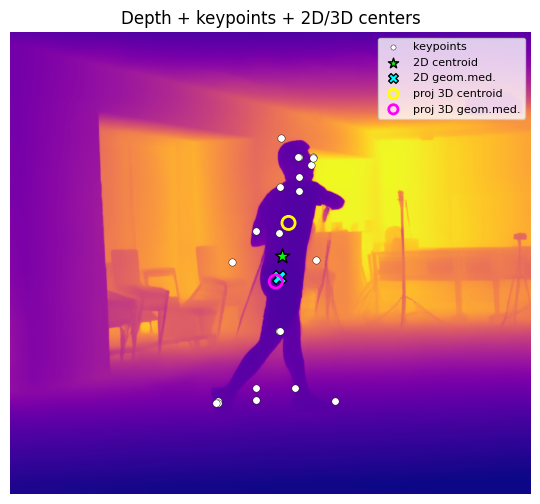

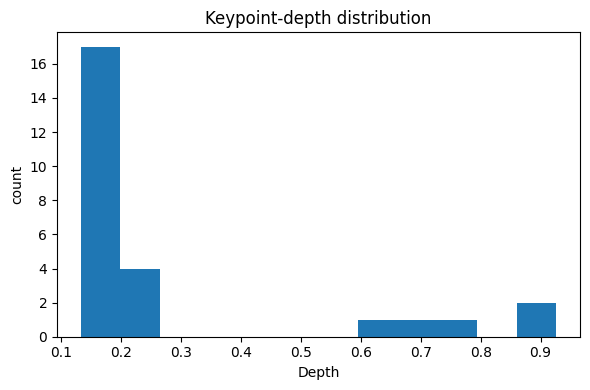

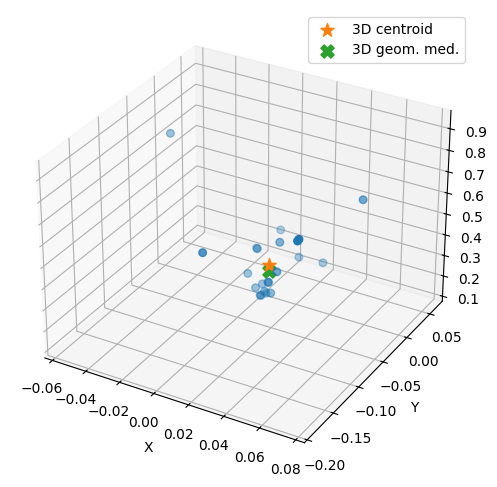

In [ ]:
# === Person center (2D + 3D) from HALPE-26 CSV + depth === this one is  current
import os, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------
# 0) Paths
# -------------------------
#csv_path = '/home/abradshaw/Marigold/frame_000205_halpe26_xy.csv'
#npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000205_depth.npy'
#csv_path = '/home/abradshaw/Marigold/HICO_test2015_00000118_halpe26_xy.csv'
#npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/HICO_test2015_00000118_depth.npy'
#csv_path = '/home/abradshaw/Marigold/frame_000197_halpe26_xy.csv'
#npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000197_depth.npy'

#csv_path = '/home/abradshaw/Marigold/frame_000211_halpe26_xy.csv'
#npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000211_depth.npy'

csv_path = '/home/abradshaw/Marigold/frame_000229_halpe26_xy.csv'
npy_path = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000229_depth.npy'
assert os.path.isfile(csv_path), f'CSV not found: {csv_path}'
assert os.path.isfile(npy_path), f'Depth not found: {npy_path}'

# -------------------------
# 1) Load keypoints + scores from CSV
# -------------------------
rows = np.loadtxt(csv_path, delimiter=",", skiprows=1, dtype=str)
# CSV columns: idx,name,x_rgb,y_rgb,score
keypoints = rows[:,2:4].astype(np.float32)   # shape (26,2)
scores    = rows[:,4].astype(np.float32)     # shape (26,)

# -------------------------
# 2) Load depth
# -------------------------
Z = np.load(npy_path).astype(np.float32)  # (H,W)
H, W = Z.shape

# -------------------------
# 3) Helpers
# -------------------------
def clip_xy(pts, W, H):
    out = pts.copy()
    out[:,0] = np.clip(out[:,0], 0, W-1)
    out[:,1] = np.clip(out[:,1], 0, H-1)
    return out

def bilinear_sample(img, x, y):
    x = float(np.clip(x, 0, img.shape[1]-1))
    y = float(np.clip(y, 0, img.shape[0]-1))
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    x1, y1 = min(x0+1, img.shape[1]-1), min(y0+1, img.shape[0]-1)
    dx, dy = x - x0, y - y0
    v00 = img[y0,x0]; v10 = img[y0,x1]; v01 = img[y1,x0]; v11 = img[y1,x1]
    return (v00*(1-dx)*(1-dy) + v10*dx*(1-dy) + v01*(1-dx)*dy + v11*dx*dy)

def geometric_median(X, eps=1e-6, max_iter=200):
    y = X.mean(axis=0)
    for _ in range(max_iter):
        d = np.linalg.norm(X - y, axis=1)
        w = 1.0 / np.clip(d, eps, None)
        y_new = (w[:,None] * X).sum(axis=0) / w.sum()
        if np.linalg.norm(y_new - y) < eps: break
        y = y_new
    return y

def backproject_points(px, py, Z_rel, fx, fy, cx, cy):
    X = (px - cx) * Z_rel / fx
    Y = (py - cy) * Z_rel / fy
    return np.stack([X, Y, Z_rel], axis=-1)

def project_point(P, fx, fy, cx, cy):
    X,Y,Zp = P
    Zp = float(max(Zp, 1e-6))
    u = cx + fx * (X / Zp)
    v = cy + fy * (Y / Zp)
    return np.array([u, v], dtype=np.float32)

# -------------------------
# 4) Prepare
# -------------------------
pts2d = clip_xy(np.round(keypoints).astype(np.int32), W, H)
kz = np.array([bilinear_sample(Z, float(x), float(y)) for x,y in keypoints], dtype=np.float32)

weights = scores / max(np.sum(scores), 1e-6)

# 2D centers
centroid_2d = (weights[:,None] * keypoints).sum(axis=0)
geommed_2d  = geometric_median(keypoints)

z_centroid_2d = float(bilinear_sample(Z, centroid_2d[0], centroid_2d[1]))
z_geommed_2d  = float(bilinear_sample(Z, geommed_2d[0],  geommed_2d[1]))

# 3D backprojection
fx = fy = float(max(H, W)); cx = (W - 1)/2; cy = (H - 1)/2
P3 = backproject_points(keypoints[:,0], keypoints[:,1], kz, fx, fy, cx, cy)
centroid_3d = (weights[:,None] * P3).sum(axis=0)
geommed_3d  = geometric_median(P3)

centroid_3d_uv = project_point(centroid_3d, fx, fy, cx, cy)
geommed_3d_uv  = project_point(geommed_3d,  fx, fy, cx, cy)

# -------------------------
# 5) Print summary
# -------------------------
print("\n=== Centers & Depths ===")
print(f"2D centroid      : ({centroid_2d[0]:.2f}, {centroid_2d[1]:.2f}), z@2D={z_centroid_2d:.6f}")
print(f"2D geom. median  : ({geommed_2d[0]:.2f}, {geommed_2d[1]:.2f}), z@2D={z_geommed_2d:.6f}")
print(f"3D centroid      : {centroid_3d}")
print(f"3D geom. median  : {geommed_3d}")
print(f"Proj(3D centroid): {centroid_3d_uv}")
print(f"Proj(3D geom.med): {geommed_3d_uv}")

print("\n=== Keypoint depth stats (26 pts) ===")
print(f"min={kz.min():.6f} | max={kz.max():.6f} | mean={kz.mean():.6f} | median={np.median(kz):.6f} | std={kz.std():.6f}")

# -------------------------
# 6) Visualizations
# -------------------------
plt.figure(figsize=(8,6))
plt.imshow(np.ma.masked_invalid(Z), cmap='plasma')
plt.scatter(pts2d[:,0], pts2d[:,1], s=28, c='white', edgecolor='k', linewidth=0.3, label='keypoints')
plt.scatter([centroid_2d[0]],[centroid_2d[1]], s=120, marker='*', c='lime', edgecolor='k', label='2D centroid')
plt.scatter([geommed_2d[0]],[geommed_2d[1]],   s=100, marker='X', c='cyan', edgecolor='k', label='2D geom.med.')
plt.scatter([centroid_3d_uv[0]],[centroid_3d_uv[1]], s=90, marker='o', facecolors='none', edgecolors='yellow', linewidth=2.0, label='proj 3D centroid')
plt.scatter([geommed_3d_uv[0]],[geommed_3d_uv[1]],   s=90, marker='o', facecolors='none', edgecolors='magenta', linewidth=2.0, label='proj 3D geom.med.')
plt.title("Depth + keypoints + 2D/3D centers")
plt.legend(fontsize=8, markerscale=0.7, frameon=True)
plt.axis('off')
plt.show()

# Histogram of depth at keypoints
plt.figure(figsize=(6,4))
plt.hist(kz, bins=min(26,12))
plt.xlabel("Depth"); plt.ylabel("count"); plt.title("Keypoint-depth distribution")
plt.tight_layout(); plt.show()

# 3D scatter
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P3[:,0], P3[:,1], P3[:,2], s=30)
ax.scatter([centroid_3d[0]], [centroid_3d[1]], [centroid_3d[2]], s=100, marker='*', label='3D centroid')
ax.scatter([geommed_3d[0]],  [geommed_3d[1]],  [geommed_3d[2]],  s=90,  marker='X', label='3D geom. med.')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z'); ax.legend()
plt.show()



=== Centers (pixels) ===
GT center (142, weighted)     : (0.00, 0.00)
Pred 2D centroid (26)         : (516.48, 425.51)  MSE=223903.94
Pred 2D geom. median (26)     : (511.02,  465.18)  MSE=238763.75
Pred proj(3D centroid) (26)   : (529.41, 362.77)  MSE=205939.81
Pred proj(3D geom. med) (26)  : (505.09,  474.17)  MSE=239976.14


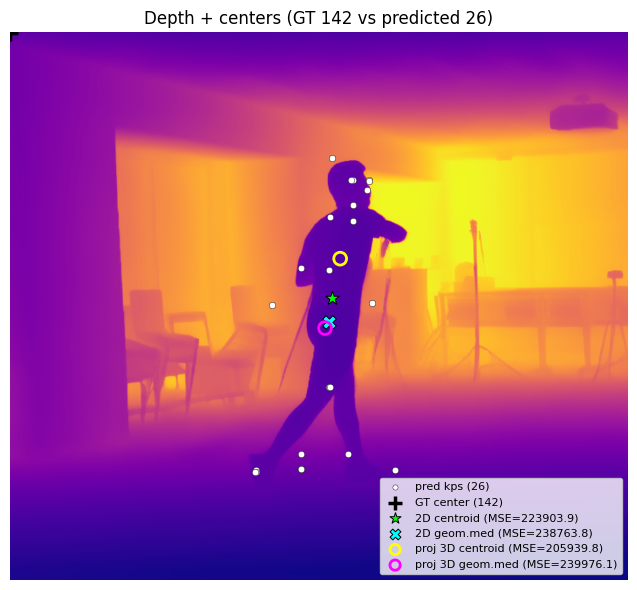


=== Ranking by MSE (lower is better) ===
  proj 3D centroid: 205939.81
       2D centroid: 223903.94
      2D geom. med: 238763.75
 proj 3D geom. med: 239976.14


In [12]:
# === Compare GT 2D center (WholeBody 142) vs four predicted centers (HALPE-26 CSV) ===
import os, numpy as np, matplotlib.pyplot as plt

# -------------------------
# 0) EDIT THESE
# -------------------------
WHOLEBODY_NPY = '/home/abradshaw/Marigold/Discus_18_cam_8.npy'   # (T, 142, 3) -> x,y,score (GT)
CSV_26        = '/home/abradshaw/Marigold/frame_000229_halpe26_xy.csv'  # predicted 26 kp for the SAME frame
DEPTH_NPY     = '/home/abradshaw/Marigold/output/in-the-wild_example/depth_npy/frame_000229_depth.npy'
FRAME_IDX     = 4   # which frame from WHOLEBODY_NPY to use for GT center

# -------------------------
# 1) Load data
# -------------------------
assert os.path.isfile(WHOLEBODY_NPY), f'Not found: {WHOLEBODY_NPY}'
wb = np.load(WHOLEBODY_NPY)  # (T, 142, 3)
assert wb.ndim == 3 and wb.shape[2] == 3, f'Expected (T,142,3), got {wb.shape}'
T, K, _ = wb.shape
assert 0 <= FRAME_IDX < T, f'FRAME_IDX must be in [0,{T-1}]'

# GT WholeBody (142) for chosen frame
gt_xy  = wb[FRAME_IDX, :, :2].astype(np.float32)       # (142,2)
gt_sc  = wb[FRAME_IDX, :,  2].astype(np.float32)       # (142,)

# Load predicted 26 kp from CSV
assert os.path.isfile(CSV_26), f'CSV not found: {CSV_26}'
rows = np.loadtxt(CSV_26, delimiter=",", skiprows=1, dtype=str)
# CSV columns: idx,name,x_rgb,y_rgb,score
pred_xy = rows[:,2:4].astype(np.float32)              # (26,2)
pred_sc = rows[:,4].astype(np.float32)                # (26,)

# Load depth for this frame
assert os.path.isfile(DEPTH_NPY), f'Depth not found: {DEPTH_NPY}'
Z = np.load(DEPTH_NPY).astype(np.float32)             # (H,W)
H, W = Z.shape

# -------------------------
# 2) Helpers
# -------------------------
def clip_xy(pts, W, H):
    out = pts.copy()
    out[:,0] = np.clip(out[:,0], 0, W-1)
    out[:,1] = np.clip(out[:,1], 0, H-1)
    return out

def bilinear_sample(img, x, y):
    x = float(np.clip(x, 0, img.shape[1]-1))
    y = float(np.clip(y, 0, img.shape[0]-1))
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    x1, y1 = min(x0+1, img.shape[1]-1), min(y0+1, img.shape[0]-1)
    dx, dy = x - x0, y - y0
    v00 = img[y0,x0]; v10 = img[y0,x1]; v01 = img[y1,x0]; v11 = img[y1,x1]
    return (v00*(1-dx)*(1-dy) + v10*dx*(1-dy) + v01*(1-dx)*dy + v11*dx*dy)

def geometric_median(X, eps=1e-6, max_iter=200):
    X = np.asarray(X, dtype=np.float64)
    y = X.mean(axis=0)
    for _ in range(max_iter):
        d = np.linalg.norm(X - y, axis=1)
        w = 1.0 / np.clip(d, eps, None)
        y_new = (w[:,None] * X).sum(axis=0) / w.sum()
        if np.linalg.norm(y_new - y) < eps: break
        y = y_new
    return y.astype(np.float32)

def backproject_points(px, py, Z_rel, fx, fy, cx, cy):
    X = (px - cx) * Z_rel / fx
    Y = (py - cy) * Z_rel / fy
    return np.stack([X, Y, Z_rel], axis=-1)

def project_point(P, fx, fy, cx, cy):
    X,Y,Zp = P
    Zp = float(max(float(Zp), 1e-6))
    u = cx + fx * (X / Zp)
    v = cy + fy * (Y / Zp)
    return np.array([u, v], dtype=np.float32)

def mse(a, b):
    a = np.asarray(a, dtype=np.float32)
    b = np.asarray(b, dtype=np.float32)
    return float(np.mean((a - b)**2))

# -------------------------
# 3) Clean/clip GT and PRED points
# -------------------------
# Mask invalid GT (nan/inf or score<=0)
gt_mask = np.isfinite(gt_xy).all(axis=1) & np.isfinite(gt_sc) & (gt_sc > 0)
gt_xy_v = gt_xy[gt_mask]
gt_sc_v = gt_sc[gt_mask]
if gt_xy_v.size == 0:
    raise ValueError("All GT keypoints are invalid or have non-positive scores.")
gt_xy_v = clip_xy(gt_xy_v, W, H)

# Predicted 26 cleanup (if any NaNs or scores <0)
pred_mask = np.isfinite(pred_xy).all(axis=1) & np.isfinite(pred_sc) & (pred_sc >= 0)
pred_xy_v = pred_xy[pred_mask]
pred_sc_v = pred_sc[pred_mask]
if pred_xy_v.shape[0] < 3:
    raise ValueError("Too few valid predicted keypoints to compute centers.")
pred_xy_v = clip_xy(pred_xy_v, W, H)

# -------------------------
# 4) GT 2D center of mass (142)
# -------------------------
w = pred_sc  # not used here; just to mirror style
gt_w = gt_sc_v / max(np.sum(gt_sc_v), 1e-6)
gt_center_2d = (gt_w[:,None] * gt_xy_v).sum(axis=0)  # (u*, v*) in pixels

# -------------------------
# 5) Predicted centers from 26 keypoints (your current logic)
# -------------------------
# Depth at each predicted kp (bilinear for stability)
pred_z = np.array([bilinear_sample(Z, float(x), float(y)) for x,y in pred_xy_v], dtype=np.float32)

# 2D centers
pred_w = pred_sc_v / max(np.sum(pred_sc_v), 1e-6)
pred_centroid_2d = (pred_w[:,None] * pred_xy_v).sum(axis=0)
pred_geommed_2d  = geometric_median(pred_xy_v)

# 3D centers (backproject → center → project back)
fx = fy = float(max(H, W))
cx = (W - 1) / 2.0
cy = (H - 1) / 2.0
P3 = backproject_points(pred_xy_v[:,0], pred_xy_v[:,1], pred_z, fx, fy, cx, cy)
centroid_3d = (pred_w[:,None] * P3).sum(axis=0)
geommed_3d  = geometric_median(P3)

pred_centroid_3d_uv = project_point(centroid_3d, fx, fy, cx, cy)
pred_geommed_3d_uv  = project_point(geommed_3d,  fx, fy, cx, cy)

# -------------------------
# 6) Errors (MSE in pixel^2) vs GT 2D center
# -------------------------
mse_centroid_2d   = mse(pred_centroid_2d,  gt_center_2d)
mse_geommed_2d    = mse(pred_geommed_2d,   gt_center_2d)
mse_centroid_3d_p = mse(pred_centroid_3d_uv, gt_center_2d)
mse_geommed_3d_p  = mse(pred_geommed_3d_uv,  gt_center_2d)

print("\n=== Centers (pixels) ===")
print(f"GT center (142, weighted)     : ({gt_center_2d[0]:.2f}, {gt_center_2d[1]:.2f})")
print(f"Pred 2D centroid (26)         : ({pred_centroid_2d[0]:.2f}, {pred_centroid_2d[1]:.2f})  MSE={mse_centroid_2d:.2f}")
print(f"Pred 2D geom. median (26)     : ({pred_geommed_2d[0]:.2f},  {pred_geommed_2d[1]:.2f})  MSE={mse_geommed_2d:.2f}")
print(f"Pred proj(3D centroid) (26)   : ({pred_centroid_3d_uv[0]:.2f}, {pred_centroid_3d_uv[1]:.2f})  MSE={mse_centroid_3d_p:.2f}")
print(f"Pred proj(3D geom. med) (26)  : ({pred_geommed_3d_uv[0]:.2f},  {pred_geommed_3d_uv[1]:.2f})  MSE={mse_geommed_3d_p:.2f}")

# -------------------------
# 7) Visualization
# -------------------------
plt.figure(figsize=(8,6))
plt.imshow(np.ma.masked_invalid(Z), cmap='plasma')

# predicted 26 points
plt.scatter(pred_xy_v[:,0], pred_xy_v[:,1], s=22, c='white', edgecolor='k', linewidth=0.3, label='pred kps (26)')

# GT center
plt.scatter([gt_center_2d[0]],[gt_center_2d[1]], s=140, marker='+', c='black', linewidths=2.5, label='GT center (142)')

# predicted centers
plt.scatter([pred_centroid_2d[0]],[pred_centroid_2d[1]], s=110, marker='*',  c='lime',    edgecolor='k', linewidth=0.7, label=f'2D centroid (MSE={mse_centroid_2d:.1f})')
plt.scatter([pred_geommed_2d[0]],[pred_geommed_2d[1]],   s=95,  marker='X',  c='cyan',    edgecolor='k', linewidth=0.7, label=f'2D geom.med (MSE={mse_geommed_2d:.1f})')
plt.scatter([pred_centroid_3d_uv[0]],[pred_centroid_3d_uv[1]], s=85, marker='o', facecolors='none', edgecolors='yellow', linewidth=2.0, label=f'proj 3D centroid (MSE={mse_centroid_3d_p:.1f})')
plt.scatter([pred_geommed_3d_uv[0]],[pred_geommed_3d_uv[1]],   s=85, marker='o', facecolors='none', edgecolors='magenta', linewidth=2.0, label=f'proj 3D geom.med (MSE={mse_geommed_3d_p:.1f})')

plt.title("Depth + centers (GT 142 vs predicted 26)")
plt.axis('off')
plt.legend(loc='lower right', fontsize=8, frameon=True, markerscale=0.8)
plt.tight_layout()
plt.show()

# Optional: print a compact ranking
pairs = [
    ("2D centroid", mse_centroid_2d),
    ("2D geom. med", mse_geommed_2d),
    ("proj 3D centroid", mse_centroid_3d_p),
    ("proj 3D geom. med", mse_geommed_3d_p),
]
pairs.sort(key=lambda x: x[1])
print("\n=== Ranking by MSE (lower is better) ===")
for name, val in pairs:
    print(f"{name:>18}: {val:.2f}")


=== Auto-alignment result ===
image size        : 1920x1088
chosen signs      : sx=+1, sy=+1
inside fraction   : 46.7%
COM (centered)    : (-643.63, -516.42)
COM (pixel)       : (316.37, 27.58)


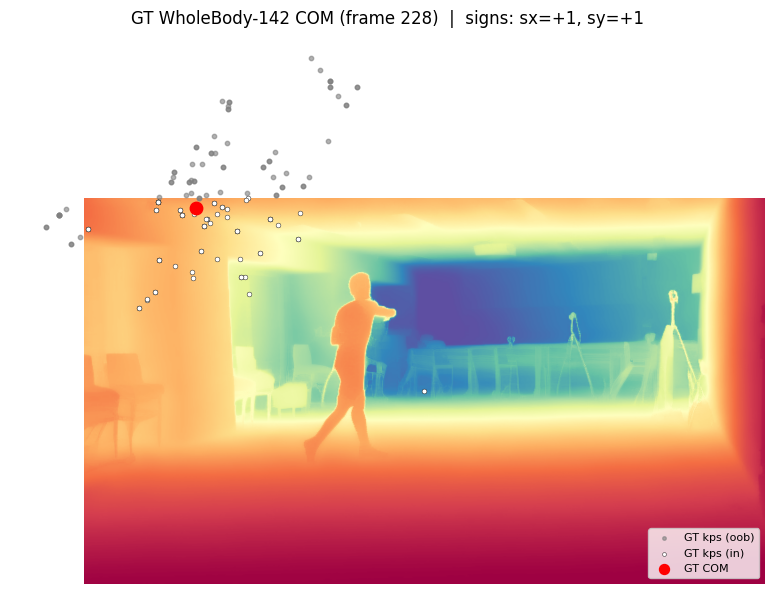

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# --- inputs ---
NPY  = "/home/abradshaw/Marigold/Discus_18_cam_8.npy"   # (T,142,3): x,y,score (centered coords)
FRAME = 228
IMG  = "/home/abradshaw/Marigold/output/in-the-wild_example/depth_colored/frame_000228_depth_colored.png"

# load image (for size + display)
img = plt.imread(IMG)  # HxWxC
H, W = img.shape[:2]

# load WB-142 for the frame
wb = np.load(NPY)                         # (T,142,3)
xy = wb[FRAME, :, :2].astype(np.float32)  # (142,2)
sc = wb[FRAME, :,  2].astype(np.float32)  # (142,)

# valid points only
valid = np.isfinite(xy).all(axis=1) & np.isfinite(sc) & (sc > 0)
# drop extreme sentinels
valid &= (np.abs(xy[:,0]) <= 4*W) & (np.abs(xy[:,1]) <= 4*H)
xy_v, sc_v = xy[valid], sc[valid]
if xy_v.size == 0:
    raise ValueError("No valid GT keypoints for this frame.")

w = sc_v / (sc_v.sum() + 1e-6)

def map_points(xy_c, sx, sy, W, H):
    """Map centered coords to pixel coords with sign flips sx, sy ∈ {+1,-1}."""
    u = W/2.0 + sx * xy_c[:,0]
    v = H/2.0 + sy * xy_c[:,1]
    return np.stack([u,v], axis=-1)

def score_mapping(uv, W, H):
    """Higher is better: fraction inside + compactness."""
    inside = (uv[:,0] >= 0) & (uv[:,0] < W) & (uv[:,1] >= 0) & (uv[:,1] < H)
    frac_in = inside.mean()
    if frac_in == 0:
        return -1e9, inside
    bb = uv[inside]
    spread = (bb[:,0].max() - bb[:,0].min()) + (bb[:,1].max() - bb[:,1].min())
    return float(frac_in*10000 - spread), inside  # tuneable

# try 4 sign combos
candidates = []
for sx in (+1, -1):
    for sy in (+1, -1):
        uv = map_points(xy_v, sx, sy, W, H)
        s, inside = score_mapping(uv, W, H)
        candidates.append((s, sx, sy, uv, inside))

candidates.sort(key=lambda t: t[0], reverse=True)
best_score, SX, SY, uv_best, inside_best = candidates[0]

# compute COM in centered coords, then map with best signs
com_centered = (w[:,None] * xy_v).sum(axis=0)              # (xc, yc)
com_pixel    = np.array([W/2.0 + SX*com_centered[0], 
                         H/2.0 + SY*com_centered[1]], dtype=np.float32)

print("=== Auto-alignment result ===")
print(f"image size        : {W}x{H}")
print(f"chosen signs      : sx={SX:+d}, sy={SY:+d}")
print(f"inside fraction   : {(inside_best.mean()*100):.1f}%")
print(f"COM (centered)    : ({com_centered[0]:.2f}, {com_centered[1]:.2f})")
print(f"COM (pixel)       : ({com_pixel[0]:.2f}, {com_pixel[1]:.2f})")

# visualize: all valid points (colored by inside/outside), plus COM
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.scatter(uv_best[~inside_best,0], uv_best[~inside_best,1], s=10, c='gray', alpha=0.6, label='GT kps (oob)')
plt.scatter(uv_best[inside_best,0],  uv_best[inside_best,1],  s=12, c='white', edgecolor='k', linewidth=0.3, label='GT kps (in)')
plt.scatter([com_pixel[0]],[com_pixel[1]], s=80, c='red', marker='o', label='GT COM')
# crosshair
plt.plot([com_pixel[0]-12, com_pixel[0]+12], [com_pixel[1], com_pixel[1]], lw=2, c='red')
plt.plot([com_pixel[0], com_pixel[0]], [com_pixel[1]-12, com_pixel[1]+12], lw=2, c='red')
plt.title(f"GT WholeBody-142 COM (frame {FRAME})  |  signs: sx={SX:+d}, sy={SY:+d}")
plt.axis('off')
plt.legend(loc='lower right', fontsize=8, frameon=True, markerscale=0.8)
plt.tight_layout()
plt.show()


CoM data shape: (360, 3)
Total frames: 360

Trajectory Statistics:
X range: -572.850 to -204.924
Y range: -999.317 to 233.691
Z range: 816.540 to 988.567
Total distance traveled: 2428.002


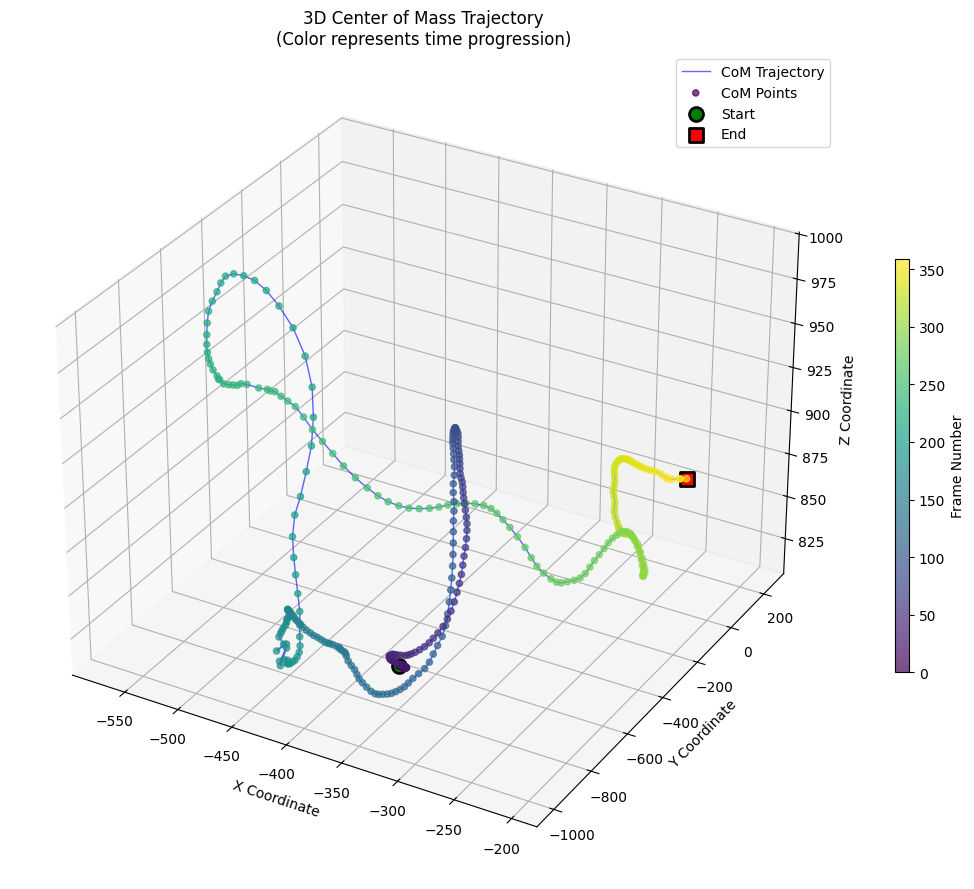

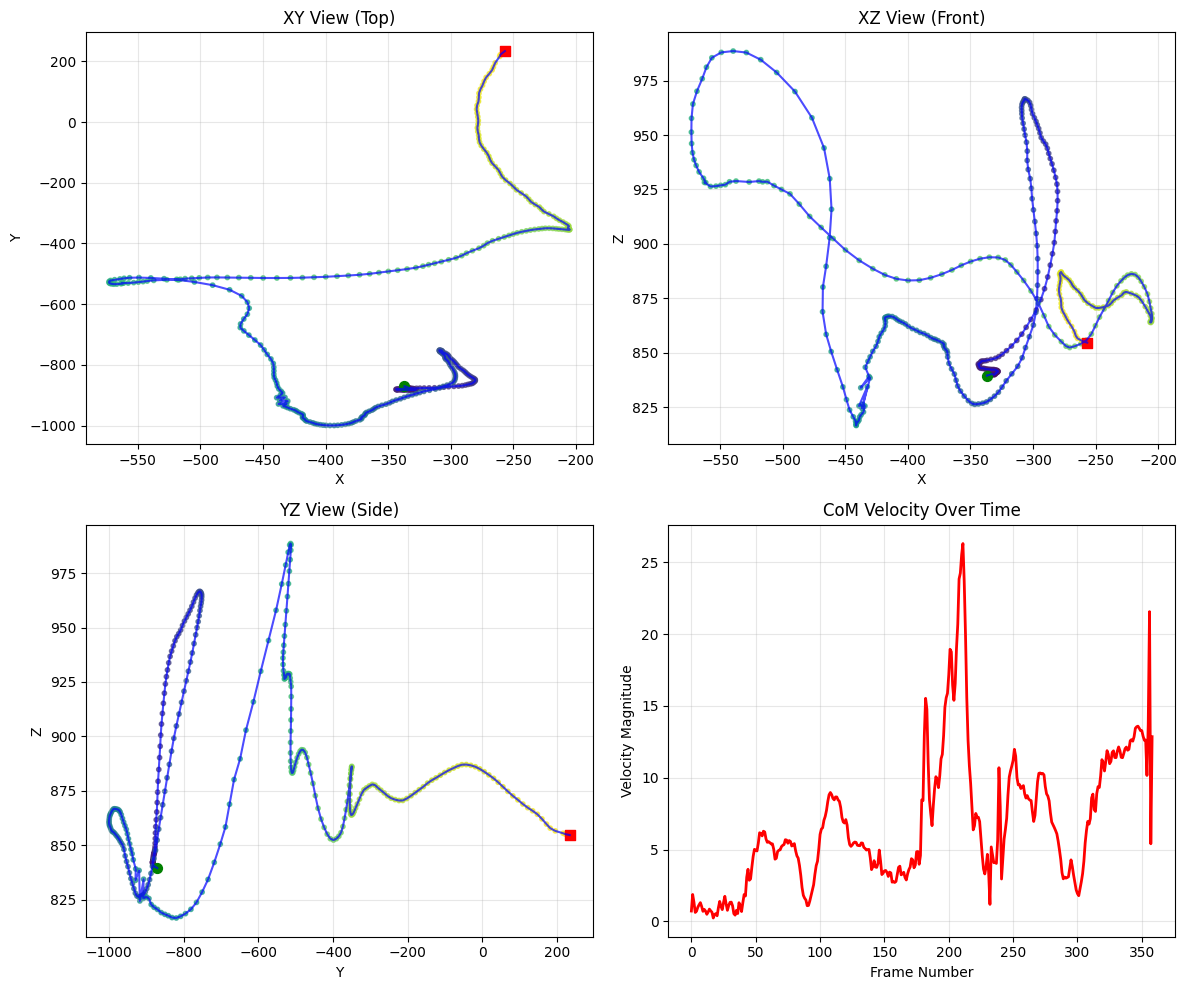

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load and process data
file_path = '/home/abradshaw/Marigold/Discus_18_cam_8.npy'
data = np.load(file_path)

# Calculate Center of Mass/Center of Geometry --> CoM
data_CoM = np.mean(data, axis=1) # data_CoM[292,3] ->> data_CoM[frames, (x,y,z)]
print(f"CoM data shape: {data_CoM.shape}")
print(f"Total frames: {data_CoM.shape[0]}")

# Extract coordinates of CoM
x = data_CoM[:, 0]
y = data_CoM[:, 1]
z = data_CoM[:, 2]


#######################################################################
#######################################################################
# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory with color gradient (time progression)
# Create color map based on frame number
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

# Plot as connected line
ax.plot(x, y, z, 'b-', alpha=0.6, linewidth=1, label='CoM Trajectory')

# Scatter plot with color gradient
scatter = ax.scatter(x, y, z, c=range(len(x)), cmap='viridis',
                    s=20, alpha=0.7, label='CoM Points')

# Mark start and end points
ax.scatter(x[0], y[0], z[0], c='green', s=100, marker='o',
          label='Start', edgecolors='black', linewidth=2)
ax.scatter(x[-1], y[-1], z[-1], c='red', s=100, marker='s',
          label='End', edgecolors='black', linewidth=2)

# Customize plot
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Center of Mass Trajectory\n(Color represents time progression)')

# Add colorbar for time progression
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=30)
cbar.set_label('Frame Number')

# Add legend
ax.legend()

# Add grid
ax.grid(True, alpha=0.3)

# Print trajectory statistics
print(f"\nTrajectory Statistics:")
print(f"X range: {np.min(x):.3f} to {np.max(x):.3f}")
print(f"Y range: {np.min(y):.3f} to {np.max(y):.3f}")
print(f"Z range: {np.min(z):.3f} to {np.max(z):.3f}")
print(f"Total distance traveled: {np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)):.3f}")

plt.tight_layout()
plt.show()

# Optional: Create multiple views
fig2, axes = plt.subplots(2, 2, figsize=(12, 10))

# XY view
axes[0,0].plot(x, y, 'b-', alpha=0.7)
axes[0,0].scatter(x, y, c=range(len(x)), cmap='viridis', s=10, alpha=0.7)
axes[0,0].scatter(x[0], y[0], c='green', s=50, marker='o')
axes[0,0].scatter(x[-1], y[-1], c='red', s=50, marker='s')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('Y')
axes[0,0].set_title('XY View (Top)')
axes[0,0].grid(True, alpha=0.3)

# XZ view
axes[0,1].plot(x, z, 'b-', alpha=0.7)
axes[0,1].scatter(x, z, c=range(len(x)), cmap='viridis', s=10, alpha=0.7)
axes[0,1].scatter(x[0], z[0], c='green', s=50, marker='o')
axes[0,1].scatter(x[-1], z[-1], c='red', s=50, marker='s')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('Z')
axes[0,1].set_title('XZ View (Front)')
axes[0,1].grid(True, alpha=0.3)

# YZ view
axes[1,0].plot(y, z, 'b-', alpha=0.7)
axes[1,0].scatter(y, z, c=range(len(x)), cmap='viridis', s=10, alpha=0.7)
axes[1,0].scatter(y[0], z[0], c='green', s=50, marker='o')
axes[1,0].scatter(y[-1], z[-1], c='red', s=50, marker='s')
axes[1,0].set_xlabel('Y')
axes[1,0].set_ylabel('Z')
axes[1,0].set_title('YZ View (Side)')
axes[1,0].grid(True, alpha=0.3)

# Velocity magnitude over time
velocity = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
axes[1,1].plot(range(len(velocity)), velocity, 'r-', linewidth=2)
axes[1,1].set_xlabel('Frame Number')
axes[1,1].set_ylabel('Velocity Magnitude')
axes[1,1].set_title('CoM Velocity Over Time')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== Heuristic 2D placement (no calibration) ===
image size      : 1920x1088
chosen flips    : sx=+1, sy=+1
scale, tx, ty   : 0.8902, 1390.19, 944.58
inside fraction : 100.0%
COM (npy space) : (-643.63, -516.42)
COM (pixel)     : (817.24, 484.87)


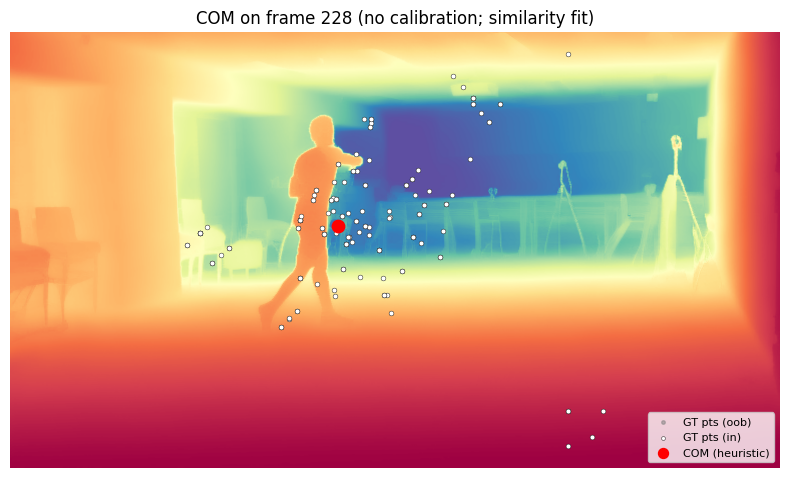

In [30]:
import os, numpy as np, matplotlib.pyplot as plt

# ---- EDIT THESE ----
NPY  = "/home/abradshaw/Marigold/Discus_18_cam_8.npy"   # (T,142,3): x,y,(z or score)
FRAME = 228
IMG  = "/home/abradshaw/Marigold/output/in-the-wild_example/depth_colored/frame_000228_depth_colored.png"
USE_SCORES_AS_WEIGHTS = True   # if the 3rd column is a confidence score; set False for uniform
MARGIN_FRAC = 0.05             # leave ~5% margin when fitting to the image
# ---------------------

# Load image (size + display)
img = plt.imread(IMG)
H, W = img.shape[:2]

# Load WB-142 for the frame
wb = np.load(NPY)                         # (T,142,3)
xy = wb[FRAME, :, :2].astype(np.float32)  # (142,2)
wcol = wb[FRAME, :,  2].astype(np.float32)

# Keep reasonable points (finite, not absurdly far)
valid = np.isfinite(xy).all(axis=1) & np.isfinite(wcol)
valid &= (np.abs(xy[:,0]) <= 1e6) & (np.abs(xy[:,1]) <= 1e6)
xy_v  = xy[valid]
wcolv = wcol[valid]
if xy_v.size == 0:
    raise ValueError("No valid keypoints in this frame.")

# Weights for COM
if USE_SCORES_AS_WEIGHTS:
    # clamp negatives to zero
    w = np.clip(wcolv, 0, None)
    s = float(w.sum()) if float(w.sum()) > 1e-6 else 1.0
    w = w / s
else:
    w = np.full((xy_v.shape[0],), 1.0/xy_v.shape[0], dtype=np.float32)

# Raw COM in npy coord system
com_raw = (w[:,None] * xy_v).sum(axis=0)  # (x_c, y_c)

# Helper: fit similarity (uniform scale + translation) with optional sign flips
def fit_to_image(pts, W, H, sx=+1, sy=+1, margin_frac=0.05):
    """Return mapped points and parameters for given sign flips."""
    if pts.shape[0] < 2:
        # not enough to size; just center
        scale = 1.0
        tx, ty = W/2.0, H/2.0
        uv = np.column_stack([tx + sx*pts[:,0]*scale, ty + sy*pts[:,1]*scale])
        return uv, scale, tx, ty

    P = pts.copy()
    P[:,0] *= sx
    P[:,1] *= sy

    xmin, ymin = P.min(axis=0)
    xmax, ymax = P.max(axis=0)
    w = xmax - xmin
    h = ymax - ymin
    if w <= 1e-6 or h <= 1e-6:
        w = h = 1.0

    # fit inside image with margin, preserve aspect ratio
    mx = margin_frac * W
    my = margin_frac * H
    avail_w = max(W - 2*mx, 1.0)
    avail_h = max(H - 2*my, 1.0)
    s = min(avail_w / w, avail_h / h)

    # map bbox center to image center
    cx, cy = (xmin + xmax)/2.0, (ymin + ymax)/2.0
    tx = (W / 2.0) - s * cx
    ty = (H / 2.0) - s * cy

    uv = np.column_stack([s*P[:,0] + tx, s*P[:,1] + ty])
    return uv, s, tx, ty

def score_mapping(uv, W, H):
    inside = (uv[:,0] >= 0) & (uv[:,0] < W) & (uv[:,1] >= 0) & (uv[:,1] < H)
    frac = inside.mean()
    if frac == 0:
        return -1e9, inside
    bb = uv[inside]
    spread = (bb[:,0].max() - bb[:,0].min()) + (bb[:,1].max() - bb[:,1].min())
    # prefer more points inside and tighter spread
    return float(frac*10000 - spread), inside

# Try four sign combinations; pick the best coverage/compactness
cands = []
for sx in (+1, -1):
    for sy in (+1, -1):
        uv, s, tx, ty = fit_to_image(xy_v, W, H, sx, sy, MARGIN_FRAC)
        scr, ins = score_mapping(uv, W, H)
        cands.append((scr, sx, sy, uv, s, tx, ty, ins))
cands.sort(key=lambda t: t[0], reverse=True)
score, SX, SY, uv_best, S, TX, TY, inside = cands[0]

# Map COM with the same similarity
com_pix = np.array([S*(SX*com_raw[0]) + TX, S*(SY*com_raw[1]) + TY], dtype=np.float32)

print("=== Heuristic 2D placement (no calibration) ===")
print(f"image size      : {W}x{H}")
print(f"chosen flips    : sx={SX:+d}, sy={SY:+d}")
print(f"scale, tx, ty   : {S:.4f}, {TX:.2f}, {TY:.2f}")
print(f"inside fraction : {(inside.mean()*100):.1f}%")
print(f"COM (npy space) : ({com_raw[0]:.2f}, {com_raw[1]:.2f})")
print(f"COM (pixel)     : ({com_pix[0]:.2f}, {com_pix[1]:.2f})")

# ---- Visualize on the image ----
plt.figure(figsize=(8,6))
plt.imshow(img)
# all points (inliers/outliers)
plt.scatter(uv_best[~inside,0], uv_best[~inside,1], s=10, c='gray', alpha=0.5, label='GT pts (oob)')
plt.scatter(uv_best[inside,0],  uv_best[inside,1],  s=12, c='white', edgecolor='k', linewidth=0.3, label='GT pts (in)')
# COM
plt.scatter([com_pix[0]], [com_pix[1]], s=80, c='red', marker='o', label='COM (heuristic)')
plt.plot([com_pix[0]-12, com_pix[0]+12], [com_pix[1], com_pix[1]], lw=2, c='red')
plt.plot([com_pix[0], com_pix[0]], [com_pix[1]-12, com_pix[1]+12], lw=2, c='red')
plt.title(f"COM on frame {FRAME} (no calibration; similarity fit)")
plt.axis('off')
plt.legend(loc='lower right', fontsize=8, frameon=True, markerscale=0.8)
plt.tight_layout()
plt.show()
